In [1]:
import sys
sys.path.insert(0, '../..')
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout, AddPolicyInfectedRate, confidence_interval, multiple_runs
from model.utils import SocialPolicy

In [2]:
listeners = [
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE, 0.00025 ,11],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL,0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE,0.00025 ,21]
]

In [3]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.9, # 0.0,
    mask_efficacy = 0.6, #0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability = 0.1,
#    asymptomatic_contagion_probability = 0.05,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    herding_behavior_mean = 0.7,
#    herding_behavior_mean = 0.1,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 0.25, #1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20)
#    spreading_rate = normal_ci(0.5, 1.5, 20)
)

sc = 10

population_size = 1000
simulation_cycles = 360 # days
seed = 31415
np.random.seed(seed)

params = copy.deepcopy(common_parameters)


By changing the coverage of school and work districts over the home districts we can make the disease spread faster or slower as desired .  
def setup_grid_layout(model, population_size,
        home_grid_height, home_grid_width,work_height,work_width, school_height, school_width):
    

Makes a grid of homogeneous home districts, overlaid by school and work districts.
    

home_grid_height is the number of home districts high the grid is, and
    

home_grid_width is the nmber of home districts wide the grid is
    

school height and work height are how many home districts high a school
    

district and work are respectively, and the same for their length.
    

each begins in grid 0,0 and cover the orignal home district grid.
    

Persons assigned to the home districts are also assigned to the school
    

and work districts that cover them. The parameters determine the amount
    

of leakage across groups of people.  With parameters (10,10,1,1,1,1), you get 100
    

completely separated districts with no leakage.  With parameters (6,6,2,2,3,3), illustrated below, you
    

get a grid where every one is connected to everyone else, but there is a
    

degree of separation.  For example, a person in home district (0,0) can be infected
    

by a person in (5,5) but it would be bridged by three infections, slowing the
    

virus down.  Larger sizes for work and school districts enable faster spread. Fastest
    

spread occurs with parameters (1,1,1,1,1,1) or equivalently (10,10, 10,10,10,10)
    

or any of the same number
    

Since this is just a way to allocate human interactions, no label is needed and
    

the grid need not be saved, for interactions to occur, although this informamtion
    

may be useful for visualizations. 


 


<img src="grids.jpg">

 Without locality, the defaults to multiple_run are :  home_grid_height = 1, home_grid_width = 1,work_height = 1, work_width =1, school_height=1, school_width=1.  


Save these seeds if you want to rerun a scenario
[9675, 7590, 802, 3752, 4216, 394, 7618, 6823, 155, 3025, 8816, 2520, 9015, 5373, 6450, 7800, 1660, 9188, 1483, 2526, 8201, 679, 1291, 6494, 909, 3893, 8248, 2433, 2843, 8253]
log initialized
Average similarity between family members is 0.9942229690607526 at temperature -1
Average similarity between family and home is 0.9945624817152198 at temperature -1
Average similarity between students and their classroom is 0.9935517694912782 at temperature -1
Average similarity between workers is 0.9943489387679207 at temperature -1
Average friend similarity for adults: 0.9918388547060455 for kids: 0.9905792502429207
run with seed 9675:
avg restaurant similarity 0.9784102947031311
avg restaurant similarity 0.9783264049631311
avg restaurant similarity 0.9802192662764148
avg restaurant similarity 0.9790768079155872
avg restaurant similarity 0.9812031591634531
avg restaurant similarity 0.9808352391400404
avg restaurant similarity 0.9793191140711656
av

avg restaurant similarity 0.981062570750402
avg restaurant similarity 0.9812979114828013
avg restaurant similarity 0.9788580196531215
avg restaurant similarity 0.9777314903458504
avg restaurant similarity 0.9788431102995204
avg restaurant similarity 0.9797017242574984
avg restaurant similarity 0.9791550230581026
avg restaurant similarity 0.9793041126478548
avg restaurant similarity 0.9791984611715564
avg restaurant similarity 0.9799389124696981
avg restaurant similarity 0.9805371754300273
avg restaurant similarity 0.9805778868812153
avg restaurant similarity 0.9811247961332523
avg restaurant similarity 0.9801497941683587
avg restaurant similarity 0.9800180813224723
avg restaurant similarity 0.9788986005478013
avg restaurant similarity 0.9794568474901753
avg restaurant similarity 0.979999163458556
avg restaurant similarity 0.9791967909016457
avg restaurant similarity 0.9800097036751226
avg restaurant similarity 0.9794170287910586
avg restaurant similarity 0.9786320413670289
avg restaura

avg restaurant similarity 0.9800658470119666
avg restaurant similarity 0.9796299178574566
avg restaurant similarity 0.9805600183640925
avg restaurant similarity 0.9776341644248414
avg restaurant similarity 0.9816189875115516
avg restaurant similarity 0.97921756262888
avg restaurant similarity 0.9783829904202329
avg restaurant similarity 0.9771141554071394
avg restaurant similarity 0.9796664615077818
avg restaurant similarity 0.9777821713702738
avg restaurant similarity 0.9787816825372245
avg restaurant similarity 0.9795518749671166
avg restaurant similarity 0.9805252947899804
avg restaurant similarity 0.9814105234522528
avg restaurant similarity 0.980606489682015
avg restaurant similarity 0.9800497672990139
avg restaurant similarity 0.9831967203069519
avg restaurant similarity 0.9788071260492662
avg restaurant similarity 0.9793497614466989
avg restaurant similarity 0.9803159198455763
avg restaurant similarity 0.9779907913501615
avg restaurant similarity 0.9800416953751616
avg restauran

avg restaurant similarity 0.9808596600813269
avg restaurant similarity 0.9826767952733458
avg restaurant similarity 0.9792210189980425
avg restaurant similarity 0.9805207011141742
avg restaurant similarity 0.9796643318435739
avg restaurant similarity 0.9799619960903377
avg restaurant similarity 0.978429147563913
avg restaurant similarity 0.9783813834073439
avg restaurant similarity 0.98095709447932
avg restaurant similarity 0.9804743404263081
avg restaurant similarity 0.9812837499054481
avg restaurant similarity 0.9800671796036715
avg restaurant similarity 0.9804630597144214
avg restaurant similarity 0.9816727005984954
avg restaurant similarity 0.9796587945350427
avg restaurant similarity 0.9792730102131252
avg restaurant similarity 0.980554807222633
avg restaurant similarity 0.9793396001617943
avg restaurant similarity 0.9787919240764485
avg restaurant similarity 0.9778746935756003
avg restaurant similarity 0.9790208795158976
avg restaurant similarity 0.9779945257804108
avg restaurant

avg restaurant similarity 0.968097571152681
avg restaurant similarity 0.9721379178556061
avg restaurant similarity 0.9752820791128783
avg restaurant similarity 0.9722716390758385
avg restaurant similarity 0.9719788306705185
avg restaurant similarity 0.9738552258584794
avg restaurant similarity 0.9728925019619616
avg restaurant similarity 0.9692166635415244
avg restaurant similarity 0.9755225694890166
avg restaurant similarity 0.9737350552049235
avg restaurant similarity 0.9717934527893783
avg restaurant similarity 0.9753738572890908
avg restaurant similarity 0.9700040310435132
avg restaurant similarity 0.9703919714930146
avg restaurant similarity 0.9739281499457418
avg restaurant similarity 0.9725084087952661
avg restaurant similarity 0.9732067309086913
avg restaurant similarity 0.9745440669623986
avg restaurant similarity 0.9732335060700591
avg restaurant similarity 0.9719787183170924
avg restaurant similarity 0.9719529753290679
avg restaurant similarity 0.9758546231248965
avg restaur

avg restaurant similarity 0.9726503745506487
avg restaurant similarity 0.9726809231566548
avg restaurant similarity 0.9735305676415165
avg restaurant similarity 0.9708147957021127
avg restaurant similarity 0.9673950075673088
avg restaurant similarity 0.9729143920844032
avg restaurant similarity 0.9709523524262894
avg restaurant similarity 0.9693080350931967
avg restaurant similarity 0.9718842626154519
avg restaurant similarity 0.9721914201366256
avg restaurant similarity 0.9695459836757225
avg restaurant similarity 0.9733138499339234
avg restaurant similarity 0.9737072227115777
avg restaurant similarity 0.974445069308738
avg restaurant similarity 0.9700845928785811
avg restaurant similarity 0.9746623742640131
avg restaurant similarity 0.971555186541121
avg restaurant similarity 0.9746874268096669
avg restaurant similarity 0.9718500415081404
avg restaurant similarity 0.9745568087214278
avg restaurant similarity 0.967105005178709
avg restaurant similarity 0.9745404079508718
avg restauran

avg restaurant similarity 0.9787276012008207
avg restaurant similarity 0.9764323985198131
avg restaurant similarity 0.9794155951047635
avg restaurant similarity 0.9759658824944996
avg restaurant similarity 0.9818684699612041
avg restaurant similarity 0.9767296337280761
avg restaurant similarity 0.9782757459303277
avg restaurant similarity 0.9807390841012886
avg restaurant similarity 0.9785611577897894
avg restaurant similarity 0.9781564080179013
avg restaurant similarity 0.9767851452414437
avg restaurant similarity 0.9768787416663992
avg restaurant similarity 0.979625742416611
avg restaurant similarity 0.9790702439813199
avg restaurant similarity 0.9774128258278357
avg restaurant similarity 0.9786983961531108
avg restaurant similarity 0.9781179998050991
avg restaurant similarity 0.978155790881023
avg restaurant similarity 0.9746919096211922
avg restaurant similarity 0.9784887818146366
avg restaurant similarity 0.9804916974289634
avg restaurant similarity 0.9771966100077237
avg restaura

Average similarity between family members is 0.9935846531937842 at temperature -1
Average similarity between family and home is 0.9938176094669465 at temperature -1
Average similarity between students and their classroom is 0.993290844441091 at temperature -1
Average similarity between workers is 0.9937066822247573 at temperature -1
Average friend similarity for adults: 0.9907698752472263 for kids: 0.9897809622256359
run with seed 4216:
avg restaurant similarity 0.97469891308977
avg restaurant similarity 0.9744279625054689
avg restaurant similarity 0.9691497792531888
avg restaurant similarity 0.9694246252099178
avg restaurant similarity 0.9738296854052644
avg restaurant similarity 0.9737569508767696
avg restaurant similarity 0.9773509479774884
avg restaurant similarity 0.9742218525658265
avg restaurant similarity 0.9738907411982204
avg restaurant similarity 0.9710884440139554
avg restaurant similarity 0.9744533547352253
avg restaurant similarity 0.9732379882320992
avg restaurant simila

avg restaurant similarity 0.9716179376453709
avg restaurant similarity 0.9704566728208199
avg restaurant similarity 0.9801773989281556
avg restaurant similarity 0.9761664931390911
avg restaurant similarity 0.97167206795735
avg restaurant similarity 0.9721088928018319
avg restaurant similarity 0.9702689537655044
avg restaurant similarity 0.9745141469827863
avg restaurant similarity 0.9747511919574775
avg restaurant similarity 0.9756056411218191
avg restaurant similarity 0.9753463822525495
avg restaurant similarity 0.9712341968768594
avg restaurant similarity 0.9725832484034601
avg restaurant similarity 0.9716180090970525
avg restaurant similarity 0.9693479452131466
avg restaurant similarity 0.9742035554641496
avg restaurant similarity 0.9729232275013805
avg restaurant similarity 0.9726227739129802
avg restaurant similarity 0.9737762696180208
avg restaurant similarity 0.9735462384407477
avg restaurant similarity 0.9782103378488755
avg restaurant similarity 0.9700533068328129
avg restaura

avg restaurant similarity 0.9712625325325007
avg restaurant similarity 0.9718368585320861
avg restaurant similarity 0.9752080516337999
avg restaurant similarity 0.9735273195538381
avg restaurant similarity 0.9714866792882892
avg restaurant similarity 0.9712866405858332
avg restaurant similarity 0.9738639358175829
avg restaurant similarity 0.9752877041710126
avg restaurant similarity 0.9758972750454106
avg restaurant similarity 0.971078067509927
avg restaurant similarity 0.9743197826933508
avg restaurant similarity 0.9749282511095451
avg restaurant similarity 0.9715203392732226
avg restaurant similarity 0.9715637210862295
avg restaurant similarity 0.977218580838255
avg restaurant similarity 0.9723688234477921
avg restaurant similarity 0.9738654043386238
avg restaurant similarity 0.9734291614748564
avg restaurant similarity 0.9745385431625674
avg restaurant similarity 0.9740348800234016
avg restaurant similarity 0.9742827311957248
avg restaurant similarity 0.9744520037129253
avg restaura

avg restaurant similarity 0.9726873992170333
avg restaurant similarity 0.9740469258818357
avg restaurant similarity 0.9739181391492069
avg restaurant similarity 0.9729273516873135
avg restaurant similarity 0.9735070373079029
avg restaurant similarity 0.9730257104457151
avg restaurant similarity 0.9732314314657742
avg restaurant similarity 0.9722418893271282
avg restaurant similarity 0.9734893327482449
avg restaurant similarity 0.9743196188178826
avg restaurant similarity 0.9731374421047709
avg restaurant similarity 0.9703487457749016
avg restaurant similarity 0.9706098162099971
avg restaurant similarity 0.9692377293322367
avg restaurant similarity 0.9726196940677396
avg restaurant similarity 0.9733106227708297
avg restaurant similarity 0.9711115700616607
avg restaurant similarity 0.9746392428011653
avg restaurant similarity 0.9752082170348109
avg restaurant similarity 0.9774728067352222
avg restaurant similarity 0.9751652632182295
avg restaurant similarity 0.9741698719697124
avg restau

avg restaurant similarity 0.9791055211845524
avg restaurant similarity 0.9794735155315228
avg restaurant similarity 0.981983420175041
avg restaurant similarity 0.9808024100839972
avg restaurant similarity 0.9820979962004304
avg restaurant similarity 0.9814361059019914
avg restaurant similarity 0.9794275467612704
avg restaurant similarity 0.980602472641564
avg restaurant similarity 0.9795629892098877
avg restaurant similarity 0.9828808296481766
avg restaurant similarity 0.982118022815997
avg restaurant similarity 0.9819405580207193
avg restaurant similarity 0.9790653940649944
avg restaurant similarity 0.9781529111507629
avg restaurant similarity 0.9804792721377192
avg restaurant similarity 0.9800697461322829
avg restaurant similarity 0.9782482072026614
avg restaurant similarity 0.978722115885504
avg restaurant similarity 0.9789501810448866
avg restaurant similarity 0.9813944045290551
avg restaurant similarity 0.9789554677951602
avg restaurant similarity 0.9806691488729183
avg restaurant

avg restaurant similarity 0.9781833982107841
avg restaurant similarity 0.9795557864689636
avg restaurant similarity 0.9810223224972948
avg restaurant similarity 0.9806910900964191
avg restaurant similarity 0.9813828793571202
avg restaurant similarity 0.9805983954412614
avg restaurant similarity 0.9786578606064451
avg restaurant similarity 0.9817687887377247
avg restaurant similarity 0.9787308919608514
avg restaurant similarity 0.9804027617523858
avg restaurant similarity 0.9784633693157428
avg restaurant similarity 0.9801038100404356
avg restaurant similarity 0.9821451814062225
avg restaurant similarity 0.9791789006322048
avg restaurant similarity 0.9816039956623476
avg restaurant similarity 0.9796111067537323
avg restaurant similarity 0.9810213872284813
avg restaurant similarity 0.9805792648129341
avg restaurant similarity 0.9799129573432578
avg restaurant similarity 0.982352729956273
avg restaurant similarity 0.9823283372462032
avg restaurant similarity 0.9784682407537602
avg restaur

avg restaurant similarity 0.983086477337064
avg restaurant similarity 0.9826525589381798
avg restaurant similarity 0.9834190524800446
avg restaurant similarity 0.9833871692688021
avg restaurant similarity 0.9827308927736789
avg restaurant similarity 0.982525155838264
avg restaurant similarity 0.982446867628791
avg restaurant similarity 0.9836169350341725
avg restaurant similarity 0.9827531952675762
avg restaurant similarity 0.983559803105316
avg restaurant similarity 0.9814859301672322
avg restaurant similarity 0.9835376018190319
avg restaurant similarity 0.9800933525017345
avg restaurant similarity 0.9829063991941758
avg restaurant similarity 0.97956606303479
avg restaurant similarity 0.9839492843996969
avg restaurant similarity 0.9797847610145897
avg restaurant similarity 0.9844375009952787
avg restaurant similarity 0.9818645739883044
avg restaurant similarity 0.9812662277039044
avg restaurant similarity 0.9847802705095753
avg restaurant similarity 0.9803067516711571
avg restaurant s

Average similarity between workers is 0.993595351510418 at temperature -1
Average friend similarity for adults: 0.9903484534970292 for kids: 0.9896809226045628
run with seed 155:
avg restaurant similarity 0.9814600930376827
avg restaurant similarity 0.9826122729829756
avg restaurant similarity 0.9818643045267116
avg restaurant similarity 0.980350113672456
avg restaurant similarity 0.9804407959384174
avg restaurant similarity 0.9817473196482855
avg restaurant similarity 0.9813704874859076
avg restaurant similarity 0.9820398797950263
avg restaurant similarity 0.9808799697711656
avg restaurant similarity 0.9822281347346367
avg restaurant similarity 0.9830624252392379
avg restaurant similarity 0.9826266050314163
avg restaurant similarity 0.9832153541418022
avg restaurant similarity 0.9830106727799608
avg restaurant similarity 0.9811682237502095
avg restaurant similarity 0.982018047837004
avg restaurant similarity 0.9803908556480522
avg restaurant similarity 0.9809385797905995
avg restauran

avg restaurant similarity 0.9823846512319869
avg restaurant similarity 0.9814853233302483
avg restaurant similarity 0.9806265318902522
avg restaurant similarity 0.9819583109877305
avg restaurant similarity 0.9809245467292645
avg restaurant similarity 0.9832987882950188
avg restaurant similarity 0.9802712079703648
avg restaurant similarity 0.9851243424899364
avg restaurant similarity 0.9810995273040471
avg restaurant similarity 0.9815481395500877
avg restaurant similarity 0.9824285709343616
avg restaurant similarity 0.9798004006848211
avg restaurant similarity 0.9827583434212086
avg restaurant similarity 0.9802650961494339
avg restaurant similarity 0.9841623938909441
avg restaurant similarity 0.982249946194267
avg restaurant similarity 0.9826527778144865
avg restaurant similarity 0.9822904991678174
avg restaurant similarity 0.9830152197104014
avg restaurant similarity 0.9791855586710773
avg restaurant similarity 0.9837599830937579
avg restaurant similarity 0.9818685241104136
avg restaur

avg restaurant similarity 0.8737658938852758
avg restaurant similarity 0.8980110309369526
avg restaurant similarity 0.8956931428458007
avg restaurant similarity 0.8735343933766622
avg restaurant similarity 0.8909037801585336
avg restaurant similarity 0.8882255212680998
avg restaurant similarity 0.9038677786429618
avg restaurant similarity 0.8932666601784828
avg restaurant similarity 0.9000701329158532
avg restaurant similarity 0.8782158223246527
avg restaurant similarity 0.898641207092412
avg restaurant similarity 0.8776122112192203
avg restaurant similarity 0.8891899848395773
avg restaurant similarity 0.9043710137210803
avg restaurant similarity 0.8796667631897804
avg restaurant similarity 0.901459379383647
avg restaurant similarity 0.8869071347409724
avg restaurant similarity 0.8855057543115837
avg restaurant similarity 0.8937520158348446
avg restaurant similarity 0.9115307808674425
avg restaurant similarity 0.9014549316799658
avg restaurant similarity 0.8954260600786457
avg restaura

avg restaurant similarity 0.893359626561793
avg restaurant similarity 0.8897841482741602
avg restaurant similarity 0.8969928045758662
avg restaurant similarity 0.9044894428043797
avg restaurant similarity 0.8827437066474562
avg restaurant similarity 0.8743984729903888
avg restaurant similarity 0.8907786778647291
avg restaurant similarity 0.8979031917573099
avg restaurant similarity 0.8868861631576505
avg restaurant similarity 0.8824614712882346
avg restaurant similarity 0.8896177227609722
avg restaurant similarity 0.9008402973167027
avg restaurant similarity 0.8942865044713796
avg restaurant similarity 0.8851440103443661
avg restaurant similarity 0.9072380456392444
avg restaurant similarity 0.903964884939073
avg restaurant similarity 0.8912329196806562
avg restaurant similarity 0.8645523573761349
avg restaurant similarity 0.8960457119385817
avg restaurant similarity 0.910301552398976
avg restaurant similarity 0.9038136632345737
avg restaurant similarity 0.9123894265812973
avg restauran

avg restaurant similarity 0.9845110872336187
avg restaurant similarity 0.9830318344809081
avg restaurant similarity 0.9835952613539315
avg restaurant similarity 0.983619041488077
avg restaurant similarity 0.9822398065821122
avg restaurant similarity 0.9840126476459461
avg restaurant similarity 0.9828540022307674
avg restaurant similarity 0.9848577825373127
avg restaurant similarity 0.9834579381680345
avg restaurant similarity 0.9854039951664345
avg restaurant similarity 0.9824628050697369
avg restaurant similarity 0.9839645151183402
avg restaurant similarity 0.9838712816890598
avg restaurant similarity 0.9823782336077339
avg restaurant similarity 0.984241077860932
avg restaurant similarity 0.9819678440946422
avg restaurant similarity 0.9830098108848002
avg restaurant similarity 0.983518122573371
avg restaurant similarity 0.9829550002521152
avg restaurant similarity 0.9828859138773431
avg restaurant similarity 0.9836953390617056
avg restaurant similarity 0.9833345890742392
avg restauran

avg restaurant similarity 0.9827037708204437
avg restaurant similarity 0.9835513121076649
avg restaurant similarity 0.9827184055158167
avg restaurant similarity 0.9834844546500291
avg restaurant similarity 0.9853213910321059
avg restaurant similarity 0.9820520930372646
avg restaurant similarity 0.9821539093780394
avg restaurant similarity 0.983674219306672
avg restaurant similarity 0.9819454598746633
avg restaurant similarity 0.9839030102189003
avg restaurant similarity 0.9845071190772928
avg restaurant similarity 0.9842241432578868
avg restaurant similarity 0.9831166731241067
avg restaurant similarity 0.9842635583318008
avg restaurant similarity 0.9821441158788519
avg restaurant similarity 0.9828456610839821
avg restaurant similarity 0.9820905270354013
avg restaurant similarity 0.984063971635356
avg restaurant similarity 0.9823052388320954
avg restaurant similarity 0.9836115147105812
avg restaurant similarity 0.9811719367988916
avg restaurant similarity 0.9854831720593841
avg restaura

avg restaurant similarity 0.9730899450856383
avg restaurant similarity 0.9754004173031269
avg restaurant similarity 0.9757169677882663
avg restaurant similarity 0.9782307328506168
avg restaurant similarity 0.9775274296425959
avg restaurant similarity 0.9750798919421167
avg restaurant similarity 0.9759346555479147
avg restaurant similarity 0.9771496716071102
avg restaurant similarity 0.9754000215365339
avg restaurant similarity 0.9762384878851083
avg restaurant similarity 0.9746944074446979
avg restaurant similarity 0.9770479571781092
avg restaurant similarity 0.9807913799356974
avg restaurant similarity 0.9780064302408471
avg restaurant similarity 0.9761373547574297
avg restaurant similarity 0.9754754892159433
avg restaurant similarity 0.9755943920273676
avg restaurant similarity 0.9784687667611195
avg restaurant similarity 0.9769958370371318
avg restaurant similarity 0.9762596065110488
avg restaurant similarity 0.9781189478767226
avg restaurant similarity 0.9772264335350902
avg restau

avg restaurant similarity 0.985433655929531
avg restaurant similarity 0.9826774908334336
avg restaurant similarity 0.9861574190191997
avg restaurant similarity 0.9834856452546541
avg restaurant similarity 0.987338267756538
avg restaurant similarity 0.9836401305984926
avg restaurant similarity 0.9857573145665637
avg restaurant similarity 0.9856196825981273
avg restaurant similarity 0.987022683325808
avg restaurant similarity 0.9874945193368344
avg restaurant similarity 0.9868794285607102
avg restaurant similarity 0.9863327738394376
avg restaurant similarity 0.9859656143340726
avg restaurant similarity 0.9855539004300085
avg restaurant similarity 0.9853872166081374
avg restaurant similarity 0.9869970217015758
avg restaurant similarity 0.9839511243114446
avg restaurant similarity 0.9848386732764137
avg restaurant similarity 0.9849564409987479
avg restaurant similarity 0.9853840346419214
avg restaurant similarity 0.9850027441906954
avg restaurant similarity 0.9830622192240129
avg restauran

avg restaurant similarity 0.9878466024341561
avg restaurant similarity 0.9877707313693996
avg restaurant similarity 0.985356553921776
avg restaurant similarity 0.9869261752754186
avg restaurant similarity 0.9878201295838271
avg restaurant similarity 0.9853303129249974
avg restaurant similarity 0.9863653803298326
avg restaurant similarity 0.9887533164506835
avg restaurant similarity 0.9822150186360861
avg restaurant similarity 0.9865573488756989
avg restaurant similarity 0.9865065661999834
avg restaurant similarity 0.9837837991614654
avg restaurant similarity 0.985674244891296
avg restaurant similarity 0.9847844846166423
avg restaurant similarity 0.987041727789697
avg restaurant similarity 0.9839565113115532
avg restaurant similarity 0.9849780489560942
avg restaurant similarity 0.9848221915275905
avg restaurant similarity 0.9866734491414246
avg restaurant similarity 0.9826189721421491
avg restaurant similarity 0.9868334360623464
avg restaurant similarity 0.98593627703734
avg restaurant 

avg restaurant similarity 0.9855582969747573
avg restaurant similarity 0.9830584818885334
avg restaurant similarity 0.98214956432817
avg restaurant similarity 0.9853098031487841
avg restaurant similarity 0.9844571928411697
avg restaurant similarity 0.9857865683318776
avg restaurant similarity 0.9881023664923535
avg restaurant similarity 0.9847558352049971
avg restaurant similarity 0.9853080376070135
avg restaurant similarity 0.9821883341207891
avg restaurant similarity 0.9863803628595104
avg restaurant similarity 0.9838565778347907
avg restaurant similarity 0.9844582298930917
avg restaurant similarity 0.9891001444314952
avg restaurant similarity 0.9856928799699296
avg restaurant similarity 0.9846417060389769
avg restaurant similarity 0.984690778302637
avg restaurant similarity 0.9876366994781265
avg restaurant similarity 0.9871148283375706
avg restaurant similarity 0.9843742784469763
avg restaurant similarity 0.9884618520882033
avg restaurant similarity 0.9854651618356178
avg restauran

avg restaurant similarity 0.9849247813968964
avg restaurant similarity 0.9850222614045019
avg restaurant similarity 0.9851982593560279
avg restaurant similarity 0.9838899663052464
avg restaurant similarity 0.9856053282536934
avg restaurant similarity 0.9866573193336979
avg restaurant similarity 0.9856528815945269
avg restaurant similarity 0.9848132236914373
avg restaurant similarity 0.9846807665055005
avg restaurant similarity 0.9828098827429448
avg restaurant similarity 0.9848636751475056
avg restaurant similarity 0.9832827530420486
avg restaurant similarity 0.9851207042219136
avg restaurant similarity 0.9833671567202416
avg restaurant similarity 0.983550088280151
avg restaurant similarity 0.9854729575701409
avg restaurant similarity 0.9841864663445853
avg restaurant similarity 0.985429097780974
avg restaurant similarity 0.985565754786808
avg restaurant similarity 0.984424424557555
avg restaurant similarity 0.9844973588974064
avg restaurant similarity 0.9855909193685227
avg restaurant

avg restaurant similarity 0.9844105757014774
avg restaurant similarity 0.9844046116015549
avg restaurant similarity 0.9845590845369742
avg restaurant similarity 0.9839711089133407
avg restaurant similarity 0.9846262057961043
avg restaurant similarity 0.9828840249358514
avg restaurant similarity 0.982695654435555
avg restaurant similarity 0.9838309505077981
avg restaurant similarity 0.9849199261911569
avg restaurant similarity 0.984180244190373
avg restaurant similarity 0.9837297537351042
avg restaurant similarity 0.9850524308754124
avg restaurant similarity 0.9835935298965932
avg restaurant similarity 0.985597941628775
avg restaurant similarity 0.9861052647326018
avg restaurant similarity 0.9849123210684604
avg restaurant similarity 0.9835654618743924
avg restaurant similarity 0.9856660302464951
avg restaurant similarity 0.98567883661357
avg restaurant similarity 0.9844152813894774
avg restaurant similarity 0.9846086708957262
avg restaurant similarity 0.9824752999660538
avg restaurant 

avg restaurant similarity 0.9842474198181649
avg restaurant similarity 0.9834136842338768
avg restaurant similarity 0.9838596401178791
avg restaurant similarity 0.9843940555989876
avg restaurant similarity 0.9821630164246005
avg restaurant similarity 0.9856606330050807
avg restaurant similarity 0.9826319224152529
avg restaurant similarity 0.9864187156738784
avg restaurant similarity 0.9843072024666533
avg restaurant similarity 0.9853765208764201
avg restaurant similarity 0.985052552082413
avg restaurant similarity 0.9826373217822257
avg restaurant similarity 0.983829754480786
avg restaurant similarity 0.9843387754046596
avg restaurant similarity 0.9846988321386464
avg restaurant similarity 0.9853183073194821
avg restaurant similarity 0.9840795051175
avg restaurant similarity 0.9852497491194226
avg restaurant similarity 0.9838292803328543
avg restaurant similarity 0.9827729379643758
avg restaurant similarity 0.9824275208497322
avg restaurant similarity 0.9838606760857982
avg restaurant 

avg restaurant similarity 0.9843646274649824
avg restaurant similarity 0.9843893612074839
avg restaurant similarity 0.986112005282902
avg restaurant similarity 0.9843995188667556
avg restaurant similarity 0.9848605714108712
avg restaurant similarity 0.9844104732068217
avg restaurant similarity 0.9857306087777273
avg restaurant similarity 0.9858399426339557
avg restaurant similarity 0.9844060877855808
avg restaurant similarity 0.9848353035310015
avg restaurant similarity 0.9847775646637884
avg restaurant similarity 0.986748197958143
avg restaurant similarity 0.9861787365539927
avg restaurant similarity 0.9851979659131227
avg restaurant similarity 0.9857774354103647
avg restaurant similarity 0.9858928036259957
avg restaurant similarity 0.9858811259969418
avg restaurant similarity 0.9854964635575832
avg restaurant similarity 0.9843305053511365
avg restaurant similarity 0.9855907702299793
avg restaurant similarity 0.9851401954854012
avg restaurant similarity 0.9843182160587841
avg restaura

avg restaurant similarity 0.9691463529227279
avg restaurant similarity 0.9739787631573549
avg restaurant similarity 0.9699606891133489
avg restaurant similarity 0.9707794908266898
avg restaurant similarity 0.9668183222898703
avg restaurant similarity 0.9671376012337579
avg restaurant similarity 0.9702726318191708
avg restaurant similarity 0.9681783082092075
avg restaurant similarity 0.9713658664130874
avg restaurant similarity 0.9692901515889131
avg restaurant similarity 0.9671718999899251
avg restaurant similarity 0.9648899183590186
avg restaurant similarity 0.9677815958179938
avg restaurant similarity 0.9734025486079187
avg restaurant similarity 0.9684393915744725
avg restaurant similarity 0.9649180865509789
avg restaurant similarity 0.9677746849674371
avg restaurant similarity 0.9691616153909028
avg restaurant similarity 0.9685773286595759
avg restaurant similarity 0.9691842450941892
avg restaurant similarity 0.9650820174294289
avg restaurant similarity 0.9675031828462526
avg restau

avg restaurant similarity 0.9671427850481346
avg restaurant similarity 0.9673646578177179
avg restaurant similarity 0.9648413399561816
avg restaurant similarity 0.96885070587871
avg restaurant similarity 0.9659236747868449
avg restaurant similarity 0.9645232738153449
avg restaurant similarity 0.9684486907593776
avg restaurant similarity 0.9661767355647609
avg restaurant similarity 0.9699565071743317
avg restaurant similarity 0.967757348550902
avg restaurant similarity 0.9696298504405898
avg restaurant similarity 0.9660716179923126
avg restaurant similarity 0.9664755894511554
avg restaurant similarity 0.9666322091426163
avg restaurant similarity 0.9660746146679859
avg restaurant similarity 0.9665858551857189
avg restaurant similarity 0.9706598240423688
avg restaurant similarity 0.9695623535696669
avg restaurant similarity 0.9683012360130384
avg restaurant similarity 0.9661452176989007
avg restaurant similarity 0.9694624595484517
avg restaurant similarity 0.9620380858698033
avg restauran

avg restaurant similarity 0.9849031632109435
avg restaurant similarity 0.9865196045347896
avg restaurant similarity 0.9866320189785249
avg restaurant similarity 0.9837462811389628
avg restaurant similarity 0.9880954311775202
avg restaurant similarity 0.9819990631175839
avg restaurant similarity 0.9822094319370784
avg restaurant similarity 0.9848525649933738
avg restaurant similarity 0.9840710828611211
avg restaurant similarity 0.9838858255434852
avg restaurant similarity 0.9855013589051705
avg restaurant similarity 0.985219724245243
avg restaurant similarity 0.9840571605498802
avg restaurant similarity 0.985521129832001
avg restaurant similarity 0.9841181196286974
avg restaurant similarity 0.9848024778372808
avg restaurant similarity 0.9834739277518999
avg restaurant similarity 0.985266617394562
avg restaurant similarity 0.9855103114941682
avg restaurant similarity 0.9836720445923514
avg restaurant similarity 0.983325477556214
avg restaurant similarity 0.985556822685982
avg restaurant 

avg restaurant similarity 0.9844241567683645
avg restaurant similarity 0.9849593448361575
avg restaurant similarity 0.9840078748628246
avg restaurant similarity 0.9853214388368794
avg restaurant similarity 0.9852158769064305
avg restaurant similarity 0.9856742147896937
avg restaurant similarity 0.9867840263891499
avg restaurant similarity 0.9841916674384382
avg restaurant similarity 0.9836826924576925
avg restaurant similarity 0.9854956527165495
avg restaurant similarity 0.9850549449358924
avg restaurant similarity 0.9837253475927431
avg restaurant similarity 0.9863116197764311
avg restaurant similarity 0.9872458133224664
avg restaurant similarity 0.9855776773134385
avg restaurant similarity 0.9850251834311597
avg restaurant similarity 0.9842955551934629
avg restaurant similarity 0.9849254550554363
avg restaurant similarity 0.985126114496188
avg restaurant similarity 0.9856352467852598
avg restaurant similarity 0.9836397729773125
avg restaurant similarity 0.9846071399660139
avg restaur

avg restaurant similarity 0.9774707954854988
avg restaurant similarity 0.9749390055750643
avg restaurant similarity 0.9784652046562619
avg restaurant similarity 0.9745531800905067
avg restaurant similarity 0.9766272400291175
avg restaurant similarity 0.9781377680219154
avg restaurant similarity 0.9773369393189537
avg restaurant similarity 0.9792561152776625
avg restaurant similarity 0.9768663573366826
avg restaurant similarity 0.9763039669473456
avg restaurant similarity 0.9773745267063286
avg restaurant similarity 0.9769051063153932
avg restaurant similarity 0.9785382412766513
avg restaurant similarity 0.9777837677169963
avg restaurant similarity 0.9767540021375487
avg restaurant similarity 0.9787465749456401
avg restaurant similarity 0.9782553528129868
avg restaurant similarity 0.9752208511466114
avg restaurant similarity 0.9789514656418382
avg restaurant similarity 0.9787714360406277
avg restaurant similarity 0.9749250610115
avg restaurant similarity 0.9781353417869045
avg restauran

avg restaurant similarity 0.9782851291136937
avg restaurant similarity 0.977870050802589
avg restaurant similarity 0.9791901219889945
avg restaurant similarity 0.9793078918374585
avg restaurant similarity 0.9773565543976458
avg restaurant similarity 0.9756285891905939
avg restaurant similarity 0.9792488911726175
avg restaurant similarity 0.9742232852946527
avg restaurant similarity 0.9784441612731762
avg restaurant similarity 0.9787800923097933
avg restaurant similarity 0.9804259289810656
avg restaurant similarity 0.9779254495131795
avg restaurant similarity 0.9777774989768722
avg restaurant similarity 0.9790740290461941
avg restaurant similarity 0.9779092331893755
avg restaurant similarity 0.9809452570426852
avg restaurant similarity 0.9797210470504416
avg restaurant similarity 0.9763497297398189
avg restaurant similarity 0.9765291986074848
avg restaurant similarity 0.9806856704543242
avg restaurant similarity 0.9781579343861246
avg restaurant similarity 0.9780457132593415
avg restaur

avg restaurant similarity 0.9544031814185547
avg restaurant similarity 0.9526632017825065
avg restaurant similarity 0.9532334000181183
avg restaurant similarity 0.9523518613628467
avg restaurant similarity 0.9517804288335407
avg restaurant similarity 0.9504891846725296
avg restaurant similarity 0.9497645101408888
avg restaurant similarity 0.9510629409535242
avg restaurant similarity 0.9525438833933366
avg restaurant similarity 0.9493193850220275
avg restaurant similarity 0.9509524981253125
avg restaurant similarity 0.9509476699925691
avg restaurant similarity 0.9542888777107256
avg restaurant similarity 0.9539067364168967
avg restaurant similarity 0.9547645415513017
avg restaurant similarity 0.9542623828380524
avg restaurant similarity 0.9530134193860488
avg restaurant similarity 0.94801424692653
avg restaurant similarity 0.9520429269119243
avg restaurant similarity 0.9540008760278796
avg restaurant similarity 0.9566250430061417
avg restaurant similarity 0.9493614380654505
avg restaura

avg restaurant similarity 0.9749927886696057
avg restaurant similarity 0.9772767738165018
avg restaurant similarity 0.9782736342126931
avg restaurant similarity 0.9771703643660934
avg restaurant similarity 0.9773426991477168
avg restaurant similarity 0.9812510006557299
avg restaurant similarity 0.9787848482494241
avg restaurant similarity 0.9778083579922484
avg restaurant similarity 0.9797766920161816
avg restaurant similarity 0.9747197183678192
avg restaurant similarity 0.9798912163703493
avg restaurant similarity 0.9780880176695841
avg restaurant similarity 0.9752465794752069
avg restaurant similarity 0.9775305502474199
avg restaurant similarity 0.975580941505152
avg restaurant similarity 0.9786668616560361
avg restaurant similarity 0.9776777993654533
avg restaurant similarity 0.9805828395504983
avg restaurant similarity 0.9784918205806531
avg restaurant similarity 0.9784634966489107
avg restaurant similarity 0.9788998258861591
avg restaurant similarity 0.9780290352329182
avg restaur

avg restaurant similarity 0.9800444379336682
avg restaurant similarity 0.9786214094126138
avg restaurant similarity 0.9783384080860843
avg restaurant similarity 0.9769941674875621
avg restaurant similarity 0.9853180961885717
avg restaurant similarity 0.9791587618022386
avg restaurant similarity 0.9777734814326193
avg restaurant similarity 0.9765452539670517
avg restaurant similarity 0.9780333198500759
avg restaurant similarity 0.9788047925049471
avg restaurant similarity 0.9755556462499203
avg restaurant similarity 0.9779010993571886
avg restaurant similarity 0.9738956375925493
avg restaurant similarity 0.9764973696699863
avg restaurant similarity 0.9798788385400731
avg restaurant similarity 0.9746411907029708
avg restaurant similarity 0.9774973578317071
avg restaurant similarity 0.9763664827865858
avg restaurant similarity 0.9795634216223946
avg restaurant similarity 0.9803336524656272
avg restaurant similarity 0.9791996243225153
avg restaurant similarity 0.9771412519346804
avg restau

avg restaurant similarity 0.9737528606387054
avg restaurant similarity 0.9759681762567839
avg restaurant similarity 0.9746156360186417
avg restaurant similarity 0.9751201765423723
avg restaurant similarity 0.9744531069375453
avg restaurant similarity 0.9765934557347775
avg restaurant similarity 0.9743612662197886
avg restaurant similarity 0.9771398924038194
avg restaurant similarity 0.9739947461103199
avg restaurant similarity 0.974413386317134
avg restaurant similarity 0.9768591548258629
avg restaurant similarity 0.9760013764933839
avg restaurant similarity 0.9803262660519471
avg restaurant similarity 0.9779111671914247
avg restaurant similarity 0.9767340678993445
avg restaurant similarity 0.9732914522694666
avg restaurant similarity 0.9740157990230456
avg restaurant similarity 0.9757118960344369
avg restaurant similarity 0.9735238903927702
avg restaurant similarity 0.9728762421372523
avg restaurant similarity 0.9709778252382908
avg restaurant similarity 0.97863128393798
avg restauran

avg restaurant similarity 0.9734080020357048
avg restaurant similarity 0.9728307750083229
avg restaurant similarity 0.9753893997471521
avg restaurant similarity 0.9764864727046861
avg restaurant similarity 0.9773247433106282
avg restaurant similarity 0.9772085001805044
avg restaurant similarity 0.9742220599705009
avg restaurant similarity 0.9742371253812948
avg restaurant similarity 0.97302580034915
avg restaurant similarity 0.9766208063376006
avg restaurant similarity 0.9715819716250543
avg restaurant similarity 0.9677616551666178
avg restaurant similarity 0.9755232434583174
avg restaurant similarity 0.9810131324213002
avg restaurant similarity 0.9766851583254917
avg restaurant similarity 0.9762532636204215
avg restaurant similarity 0.9744071795799615
avg restaurant similarity 0.9783973690107629
avg restaurant similarity 0.9777334721755507
avg restaurant similarity 0.9778629555933059
avg restaurant similarity 0.9753138542138361
avg restaurant similarity 0.974837335239068
avg restauran

avg restaurant similarity 0.9821932862023218
avg restaurant similarity 0.9807365488013673
avg restaurant similarity 0.9808207225197795
avg restaurant similarity 0.9806141452088124
avg restaurant similarity 0.9790524309937136
avg restaurant similarity 0.9820604691542147
avg restaurant similarity 0.9839085850931873
avg restaurant similarity 0.9766423568148304
avg restaurant similarity 0.9793754401693384
avg restaurant similarity 0.9807425039592265
avg restaurant similarity 0.979277031427722
avg restaurant similarity 0.980676952942069
avg restaurant similarity 0.981834866013543
avg restaurant similarity 0.9819155039818355
avg restaurant similarity 0.9804900285252026
avg restaurant similarity 0.9808870866638665
avg restaurant similarity 0.9812901650966045
avg restaurant similarity 0.9811232485426798
avg restaurant similarity 0.9785751984004538
avg restaurant similarity 0.9811372718579884
avg restaurant similarity 0.9801387559709139
avg restaurant similarity 0.9796885735943037
avg restauran

avg restaurant similarity 0.9819826750296723
avg restaurant similarity 0.9774514631632939
avg restaurant similarity 0.9816707263375297
avg restaurant similarity 0.9813988922345764
avg restaurant similarity 0.9810264103879438
avg restaurant similarity 0.9782259381333566
avg restaurant similarity 0.980653415867201
avg restaurant similarity 0.9799121946816954
avg restaurant similarity 0.982189790180206
avg restaurant similarity 0.9788936857757797
avg restaurant similarity 0.9810825689362016
avg restaurant similarity 0.9823433311519951
avg restaurant similarity 0.9783037614934077
avg restaurant similarity 0.9790423634126476
avg restaurant similarity 0.9827875680324958
avg restaurant similarity 0.9804203237133735
avg restaurant similarity 0.9826185945317943
avg restaurant similarity 0.9798240966883718
avg restaurant similarity 0.9805366270716525
avg restaurant similarity 0.9806654209980805
avg restaurant similarity 0.9812691142597955
Average similarity between family members is 0.9920166814

avg restaurant similarity 0.9729156295878261
avg restaurant similarity 0.9751841590138031
avg restaurant similarity 0.9741379054090803
avg restaurant similarity 0.973010632455717
avg restaurant similarity 0.9737035556414084
avg restaurant similarity 0.9774686573229394
avg restaurant similarity 0.97293165220442
avg restaurant similarity 0.9701396716886144
avg restaurant similarity 0.9755825943951614
avg restaurant similarity 0.9711065904974523
avg restaurant similarity 0.9793914660548291
avg restaurant similarity 0.9751484664503209
avg restaurant similarity 0.9723801071132997
avg restaurant similarity 0.9777895401672645
avg restaurant similarity 0.9739611527340484
avg restaurant similarity 0.979315222290684
avg restaurant similarity 0.9765616754864065
avg restaurant similarity 0.9744086788627531
avg restaurant similarity 0.9724931805044859
avg restaurant similarity 0.9731077511263466
avg restaurant similarity 0.9735551075414011
avg restaurant similarity 0.9736439892435865
avg restaurant

avg restaurant similarity 0.9802324942870936
avg restaurant similarity 0.9602264061190947
avg restaurant similarity 0.9789887155048728
avg restaurant similarity 0.9650640822192259
avg restaurant similarity 0.9705065861259505
avg restaurant similarity 0.9668737384870435
avg restaurant similarity 0.9751776642078839
avg restaurant similarity 0.976530466258512
avg restaurant similarity 0.9698928281991729
avg restaurant similarity 0.9727292673144646
avg restaurant similarity 0.9661709723680018
avg restaurant similarity 0.9701622466423986
avg restaurant similarity 0.9762309562314345
avg restaurant similarity 0.9727876512573989
avg restaurant similarity 0.9772592128618551
avg restaurant similarity 0.9810525391067609
avg restaurant similarity 0.9687210746921299
avg restaurant similarity 0.9706236762448769
avg restaurant similarity 0.9600867783069517
avg restaurant similarity 0.9569161872295351
avg restaurant similarity 0.9599286704262019
avg restaurant similarity 0.9702485964561546
avg restaur

avg restaurant similarity 0.9705008185727586
avg restaurant similarity 0.9614154632209555
avg restaurant similarity 0.956964813462982
avg restaurant similarity 0.9494368040870017
avg restaurant similarity 0.9684732312929704
avg restaurant similarity 0.9624715613389349
avg restaurant similarity 0.969588175863866
avg restaurant similarity 0.978709396326699
avg restaurant similarity 0.970737924211352
avg restaurant similarity 0.9744965016980821
avg restaurant similarity 0.9667854737045651
avg restaurant similarity 0.9674925075909038
avg restaurant similarity 0.9683747941568116
avg restaurant similarity 0.9753382976376873
avg restaurant similarity 0.9614516561596743
avg restaurant similarity 0.9797633425506734
avg restaurant similarity 0.9736712677759047
avg restaurant similarity 0.9687812478155552
avg restaurant similarity 0.9762089348442885
avg restaurant similarity 0.972242525304896
avg restaurant similarity 0.9760366855244071
avg restaurant similarity 0.9719791712029192
avg restaurant 

avg restaurant similarity 0.9706193843901897
avg restaurant similarity 0.9652165197661702
avg restaurant similarity 0.9676389019873796
avg restaurant similarity 0.9667595958541827
avg restaurant similarity 0.9689635262508605
avg restaurant similarity 0.9665111341777762
avg restaurant similarity 0.9645429182052153
avg restaurant similarity 0.9657844889866787
avg restaurant similarity 0.9722358767724881
avg restaurant similarity 0.966158765529366
avg restaurant similarity 0.9703029453476751
avg restaurant similarity 0.9661335984195683
avg restaurant similarity 0.9660182918648827
avg restaurant similarity 0.967456511597467
avg restaurant similarity 0.9696260930526408
avg restaurant similarity 0.966345377128211
avg restaurant similarity 0.967836135063403
avg restaurant similarity 0.966576423624848
avg restaurant similarity 0.9644707019755048
avg restaurant similarity 0.965904794593843
avg restaurant similarity 0.9744593937143621
avg restaurant similarity 0.9651979577677346
avg restaurant s

avg restaurant similarity 0.9706687967694239
avg restaurant similarity 0.9723009377333144
avg restaurant similarity 0.971295720561514
avg restaurant similarity 0.9679957349334598
avg restaurant similarity 0.9654382129109806
avg restaurant similarity 0.9673463456995187
avg restaurant similarity 0.9653413333163431
avg restaurant similarity 0.9675002617614943
avg restaurant similarity 0.9693796543624689
avg restaurant similarity 0.96804578761209
avg restaurant similarity 0.9711106135450536
avg restaurant similarity 0.9691249709978701
avg restaurant similarity 0.9662866254195546
avg restaurant similarity 0.9676812499953398
avg restaurant similarity 0.9689612086672412
avg restaurant similarity 0.9676179027194178
avg restaurant similarity 0.9685634200111651
avg restaurant similarity 0.9677867484357372
avg restaurant similarity 0.9700339937622215
avg restaurant similarity 0.9681599651667454
avg restaurant similarity 0.9717506056859011
avg restaurant similarity 0.9680520283826509
avg restauran

avg restaurant similarity 0.9730492319079722
avg restaurant similarity 0.9743905882573864
avg restaurant similarity 0.9731998674037546
avg restaurant similarity 0.9733480420828413
avg restaurant similarity 0.976724721201158
avg restaurant similarity 0.9745580407903545
avg restaurant similarity 0.9727405006344317
avg restaurant similarity 0.9732559676228577
avg restaurant similarity 0.9734899853233531
avg restaurant similarity 0.9713641938853697
avg restaurant similarity 0.9718825800434147
avg restaurant similarity 0.9739020330801235
avg restaurant similarity 0.972466236838946
avg restaurant similarity 0.9745101501637042
avg restaurant similarity 0.972932190927378
avg restaurant similarity 0.9729730454286732
avg restaurant similarity 0.9735854311928852
avg restaurant similarity 0.9710707278632276
avg restaurant similarity 0.9753741589273414
avg restaurant similarity 0.9729685925494836
avg restaurant similarity 0.9712759505257391
avg restaurant similarity 0.9721863196795696
avg restauran

avg restaurant similarity 0.9724598616764019
avg restaurant similarity 0.9732627435265114
avg restaurant similarity 0.9712220894643979
avg restaurant similarity 0.9734583869697186
avg restaurant similarity 0.9725879177719384
avg restaurant similarity 0.9725075043862663
avg restaurant similarity 0.9732885410335977
avg restaurant similarity 0.9757780852264698
avg restaurant similarity 0.9749288323993044
avg restaurant similarity 0.9741060785463023
avg restaurant similarity 0.9705977966532083
avg restaurant similarity 0.975136870959649
avg restaurant similarity 0.9717240197430854
avg restaurant similarity 0.9754420575880017
avg restaurant similarity 0.9736931726357637
avg restaurant similarity 0.978285356190054
Average similarity between family members is 0.9931144853672773 at temperature -1
Average similarity between family and home is 0.9930404823876897 at temperature -1
Average similarity between students and their classroom is 0.9925604427248879 at temperature -1
Average similarity be

avg restaurant similarity 0.9716943781532158
avg restaurant similarity 0.9680808986712105
avg restaurant similarity 0.9751684894970483
avg restaurant similarity 0.9734021543358397
avg restaurant similarity 0.9670030682383555
avg restaurant similarity 0.9686352902424272
avg restaurant similarity 0.9747195374634334
avg restaurant similarity 0.9704038073743209
avg restaurant similarity 0.9739798191899112
avg restaurant similarity 0.971400516290002
avg restaurant similarity 0.9691771546273503
avg restaurant similarity 0.9734673850696559
avg restaurant similarity 0.9700706588191707
avg restaurant similarity 0.9643110188944185
avg restaurant similarity 0.9700274348268323
avg restaurant similarity 0.9752261757761309
avg restaurant similarity 0.9718294805265326
avg restaurant similarity 0.9735438032469789
avg restaurant similarity 0.9695080953894392
avg restaurant similarity 0.9709778079788949
avg restaurant similarity 0.9714562195806058
avg restaurant similarity 0.9723199804238071
avg restaur

avg restaurant similarity 0.9830172557445315
avg restaurant similarity 0.9806924747579053
avg restaurant similarity 0.9858503182243334
avg restaurant similarity 0.9816586547601663
avg restaurant similarity 0.9818159271488032
avg restaurant similarity 0.9821417325551223
avg restaurant similarity 0.9810071982978263
avg restaurant similarity 0.9833860679818454
avg restaurant similarity 0.9820890224948116
avg restaurant similarity 0.981605704668347
avg restaurant similarity 0.9809969269718095
avg restaurant similarity 0.9839368000469927
avg restaurant similarity 0.9815186262691467
avg restaurant similarity 0.9798262873886318
avg restaurant similarity 0.9810775123295501
avg restaurant similarity 0.9814139592356734
avg restaurant similarity 0.9824298078118866
avg restaurant similarity 0.982403766368888
avg restaurant similarity 0.9787299487690144
avg restaurant similarity 0.9823560086419296
avg restaurant similarity 0.9817068982968495
avg restaurant similarity 0.9819166418866095
avg restaura

avg restaurant similarity 0.9820479513702113
avg restaurant similarity 0.9837323901126858
avg restaurant similarity 0.9825756347673941
avg restaurant similarity 0.9804324962234351
avg restaurant similarity 0.9822357741083244
avg restaurant similarity 0.9828417893529173
avg restaurant similarity 0.9800056437343836
avg restaurant similarity 0.9833998181147787
avg restaurant similarity 0.982638709119009
avg restaurant similarity 0.9796723187200217
avg restaurant similarity 0.9821056492374807
avg restaurant similarity 0.982098441682792
avg restaurant similarity 0.983488700388452
avg restaurant similarity 0.9829629036825321
avg restaurant similarity 0.9821542948495401
avg restaurant similarity 0.9800095873416583
avg restaurant similarity 0.9818011610298755
avg restaurant similarity 0.9802113774438378
avg restaurant similarity 0.9821453460273201
avg restaurant similarity 0.9797324337114593
avg restaurant similarity 0.9788071615307773
avg restaurant similarity 0.9829858012724905
avg restauran

avg restaurant similarity 0.9730601697238709
avg restaurant similarity 0.9767059249767617
avg restaurant similarity 0.9704741314039856
avg restaurant similarity 0.972972669040806
avg restaurant similarity 0.9762093250722079
avg restaurant similarity 0.9718139195137351
avg restaurant similarity 0.9734384752023417
avg restaurant similarity 0.9758451127739793
avg restaurant similarity 0.9630289539601902
avg restaurant similarity 0.972174539513363
avg restaurant similarity 0.9669409214907869
avg restaurant similarity 0.961321367425879
avg restaurant similarity 0.9694085954449656
avg restaurant similarity 0.9718341644984658
avg restaurant similarity 0.9690899837736143
avg restaurant similarity 0.9789290908117587
avg restaurant similarity 0.9694362784475796
avg restaurant similarity 0.9691207484468806
avg restaurant similarity 0.975256612975835
avg restaurant similarity 0.9660525544520912
avg restaurant similarity 0.9647798644106088
avg restaurant similarity 0.9679357625175535
avg restaurant

avg restaurant similarity 0.9648629168634473
avg restaurant similarity 0.9724712189840617
avg restaurant similarity 0.9725282117422086
avg restaurant similarity 0.9738786643456767
avg restaurant similarity 0.9702687057850621
avg restaurant similarity 0.9700402226550704
avg restaurant similarity 0.970806762521636
avg restaurant similarity 0.9735150187007591
avg restaurant similarity 0.966589552127644
avg restaurant similarity 0.9707322017356135
avg restaurant similarity 0.9644335622066221
avg restaurant similarity 0.9732102948451682
avg restaurant similarity 0.9730318184626789
avg restaurant similarity 0.9740914453855528
avg restaurant similarity 0.9756157323462336
avg restaurant similarity 0.97704149007334
avg restaurant similarity 0.9713484826880272
avg restaurant similarity 0.9734231808034417
avg restaurant similarity 0.9727012985622794
avg restaurant similarity 0.9700541368788446
avg restaurant similarity 0.9690440533566687
avg restaurant similarity 0.9699448687696253
avg restaurant

(<function dict.items>, <function dict.items>, <function dict.items>)

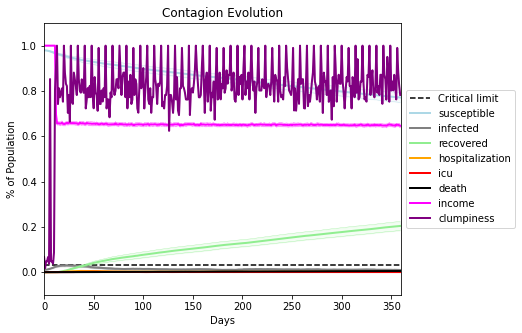

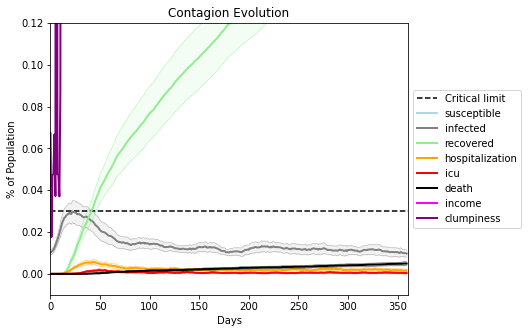

In [4]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -1
params.params['num_communities'] = 1
seeds = [9675, 7590, 802, 3752, 4216, 394, 7618, 6823, 155, 3025, 8816, 2520, 9015, 5373, 6450, 7800, 1660, 9188, 1483, 2526, 8201, 679, 1291, 6494, 909, 3893, 8248, 2433, 2843, 8253]
setLevel(logging.DEBUG)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, home_grid_height = 1, home_grid_width = 1, listeners = listeners)

In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 1
params.params['num_communities'] = 1
seeds = [9675, 7590, 802, 3752, 4216, 394, 7618, 6823, 155, 3025, 8816, 2520, 9015, 5373, 6450, 7800, 1660, 9188, 1483, 2526, 8201, 679, 1291, 6494, 909, 3893, 8248, 2433, 2843, 8253]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, home_grid_height = 1, home_grid_width = 1, listeners = listeners)

Save these seeds if you want to rerun a scenario
[9675, 7590, 802, 3752, 4216, 394, 7618, 6823, 155, 3025, 8816, 2520, 9015, 5373, 6450, 7800, 1660, 9188, 1483, 2526, 8201, 679, 1291, 6494, 909, 3893, 8248, 2433, 2843, 8253]
Average similarity between family members is 0.9756082637786119 at temperature 1
Average similarity between family and home is 0.993635138917337 at temperature -1
Average similarity between students and their classroom is 0.9747039017855812 at temperature 1
Average similarity between workers is 0.975502317042225 at temperature 1
Average friend similarity for adults: 0.9895431774397639 for kids: 0.9885969395206784
run with seed 9675:
avg restaurant similarity 0.9764937399218508
avg restaurant similarity 0.9758610249407044
avg restaurant similarity 0.974686410139094
avg restaurant similarity 0.9768621460431379
avg restaurant similarity 0.9768613745260356
avg restaurant similarity 0.9740025438711185
avg restaurant similarity 0.9740054125937463
avg restaurant similarit

avg restaurant similarity 0.9756153696326845
avg restaurant similarity 0.9755102985568396
avg restaurant similarity 0.9767308183293105
avg restaurant similarity 0.9762291703030321
avg restaurant similarity 0.9761237358885656
avg restaurant similarity 0.9756221295870887
avg restaurant similarity 0.9745912613320152
avg restaurant similarity 0.975547202447319
avg restaurant similarity 0.9768853431894845
avg restaurant similarity 0.973884968889861
avg restaurant similarity 0.9759780126748819
avg restaurant similarity 0.9762835261523718
avg restaurant similarity 0.9771167501481828
avg restaurant similarity 0.975393208462039
avg restaurant similarity 0.9744743977610981
avg restaurant similarity 0.9763404257187561
avg restaurant similarity 0.9749162768818136
avg restaurant similarity 0.9729661816973306
avg restaurant similarity 0.9762687156281689
avg restaurant similarity 0.975758903005689
avg restaurant similarity 0.9747172364837078
avg restaurant similarity 0.9741012912811517
avg restaurant

avg restaurant similarity 0.9729857346727699
avg restaurant similarity 0.974259725226903
avg restaurant similarity 0.9709905788234343
avg restaurant similarity 0.9738875382289136
avg restaurant similarity 0.9731139840910035
avg restaurant similarity 0.9734647077882309
avg restaurant similarity 0.9760297892535502
avg restaurant similarity 0.9751733610100048
avg restaurant similarity 0.9756596010872173
avg restaurant similarity 0.9725738922317013
avg restaurant similarity 0.9741730519885401
avg restaurant similarity 0.9724964314761262
avg restaurant similarity 0.9712382745965048
avg restaurant similarity 0.9738089658165088
avg restaurant similarity 0.971595535572971
avg restaurant similarity 0.9748272822759508
avg restaurant similarity 0.972322378347247
avg restaurant similarity 0.9759082729545352
avg restaurant similarity 0.9746149452771007
avg restaurant similarity 0.9714297041674541
avg restaurant similarity 0.9744149506058597
avg restaurant similarity 0.9751210473216746
avg restauran

avg restaurant similarity 0.9731781548370693
avg restaurant similarity 0.9754026159534921
avg restaurant similarity 0.974858239057613
avg restaurant similarity 0.9722595025577278
avg restaurant similarity 0.9743352155218294
avg restaurant similarity 0.9735269795473647
avg restaurant similarity 0.9731189005749005
avg restaurant similarity 0.9735590583046675
avg restaurant similarity 0.9747480228423719
avg restaurant similarity 0.9728481614584399
avg restaurant similarity 0.974011463869866
avg restaurant similarity 0.9718554743883628
avg restaurant similarity 0.9737095951847117
avg restaurant similarity 0.9748402244508944
avg restaurant similarity 0.9733386051223989
avg restaurant similarity 0.9741481203192431
avg restaurant similarity 0.9751096452353366
avg restaurant similarity 0.9755002134069232
avg restaurant similarity 0.9732317578940258
avg restaurant similarity 0.9719985299188294
avg restaurant similarity 0.9708536449393158
avg restaurant similarity 0.9727132878988539
avg restaura

avg restaurant similarity 0.9790226054220308
avg restaurant similarity 0.9778831720979011
avg restaurant similarity 0.9783403633591208
avg restaurant similarity 0.9768691681293603
avg restaurant similarity 0.9762835675631546
avg restaurant similarity 0.9777386544088368
avg restaurant similarity 0.97793606812878
avg restaurant similarity 0.9745525880413433
avg restaurant similarity 0.9781594371658825
avg restaurant similarity 0.9779269182477951
avg restaurant similarity 0.9750610077573111
avg restaurant similarity 0.9786029477253465
avg restaurant similarity 0.978019782544047
avg restaurant similarity 0.9750322269731886
avg restaurant similarity 0.9777064631222954
avg restaurant similarity 0.9754012045074888
avg restaurant similarity 0.9775176591508463
avg restaurant similarity 0.9771852159534161
avg restaurant similarity 0.9751076749584446
avg restaurant similarity 0.976383229101121
avg restaurant similarity 0.9767529224769188
avg restaurant similarity 0.9736564851709792
avg restaurant

avg restaurant similarity 0.9756295273431647
avg restaurant similarity 0.9749677960192903
avg restaurant similarity 0.9779802302314667
avg restaurant similarity 0.9762295380523017
avg restaurant similarity 0.9766161322623923
avg restaurant similarity 0.9766925696598526
avg restaurant similarity 0.9775343097089658
avg restaurant similarity 0.9789114597786874
avg restaurant similarity 0.9776661137054103
avg restaurant similarity 0.9760771547038793
avg restaurant similarity 0.9744838344429672
avg restaurant similarity 0.9771479962653324
avg restaurant similarity 0.9764628942926181
avg restaurant similarity 0.9770318280259415
avg restaurant similarity 0.9762038271645362
avg restaurant similarity 0.9792948691923841
avg restaurant similarity 0.974635146551354
avg restaurant similarity 0.9748287073333992
avg restaurant similarity 0.9758870411177647
avg restaurant similarity 0.9748742849771093
avg restaurant similarity 0.9776049826182986
avg restaurant similarity 0.9753826132129889
avg restaur

avg restaurant similarity 0.9744716643928101
avg restaurant similarity 0.974749731570316
avg restaurant similarity 0.975052489956122
avg restaurant similarity 0.9746955385099938
avg restaurant similarity 0.9737195542655085
avg restaurant similarity 0.9768131441347392
avg restaurant similarity 0.976746837479981
avg restaurant similarity 0.9775267029423811
avg restaurant similarity 0.9753256094894959
avg restaurant similarity 0.9752529140341476
avg restaurant similarity 0.9756124587208775
avg restaurant similarity 0.9759375768106217
avg restaurant similarity 0.978717672155728
avg restaurant similarity 0.9765063735860994
avg restaurant similarity 0.9761850634969751
avg restaurant similarity 0.9752447934118096
avg restaurant similarity 0.9765332505157238
avg restaurant similarity 0.9727949450873365
avg restaurant similarity 0.9758934647666121
avg restaurant similarity 0.9784335134527959
avg restaurant similarity 0.9727828538224025
avg restaurant similarity 0.9778051159493218
avg restaurant

Average similarity between family members is 0.972841272793895 at temperature 1
Average similarity between family and home is 0.9930959885764823 at temperature -1
Average similarity between students and their classroom is 0.9741509188807285 at temperature 1
Average similarity between workers is 0.9729908894988033 at temperature 1
Average friend similarity for adults: 0.9879758178436154 for kids: 0.9875762366103112
run with seed 4216:
avg restaurant similarity 0.9626982638995797
avg restaurant similarity 0.9577927328691883
avg restaurant similarity 0.9581009938313426
avg restaurant similarity 0.9500160545482066
avg restaurant similarity 0.9556134450568331
avg restaurant similarity 0.9556664721671823
avg restaurant similarity 0.9516159242366884
avg restaurant similarity 0.9563498724269531
avg restaurant similarity 0.9600799977201314
avg restaurant similarity 0.9571928280366581
avg restaurant similarity 0.9602384130500039
avg restaurant similarity 0.9523009888101146
avg restaurant similar

avg restaurant similarity 0.9496294618587163
avg restaurant similarity 0.9592537049727804
avg restaurant similarity 0.9500273452047604
avg restaurant similarity 0.9622111140953362
avg restaurant similarity 0.9527084422558321
avg restaurant similarity 0.9516316115513739
avg restaurant similarity 0.9536062673087504
avg restaurant similarity 0.9609208626973551
avg restaurant similarity 0.9506799180124826
avg restaurant similarity 0.9580948809473884
avg restaurant similarity 0.9551605200431209
avg restaurant similarity 0.9546386363806428
avg restaurant similarity 0.9515315628593553
avg restaurant similarity 0.9598848278277485
avg restaurant similarity 0.9562312220826827
avg restaurant similarity 0.9492048382590325
avg restaurant similarity 0.951940577361924
avg restaurant similarity 0.9540974606557401
avg restaurant similarity 0.9599228855156483
avg restaurant similarity 0.9573931459566536
avg restaurant similarity 0.9563756608541197
avg restaurant similarity 0.9525979737419092
avg restaur

avg restaurant similarity 0.9740834242998357
avg restaurant similarity 0.968076646832726
avg restaurant similarity 0.97023207153503
avg restaurant similarity 0.9641992667358078
avg restaurant similarity 0.9697969919720281
avg restaurant similarity 0.9686404424182905
avg restaurant similarity 0.9674947550002417
avg restaurant similarity 0.9711564374237602
avg restaurant similarity 0.967896051443262
avg restaurant similarity 0.965513607922151
avg restaurant similarity 0.9722890141299981
avg restaurant similarity 0.9691002584585919
avg restaurant similarity 0.9700868084556286
avg restaurant similarity 0.9688959924668246
avg restaurant similarity 0.96781942175181
avg restaurant similarity 0.9674770007265786
avg restaurant similarity 0.9721804179552954
avg restaurant similarity 0.9691458240025234
avg restaurant similarity 0.9676559255068581
avg restaurant similarity 0.966249093136822
avg restaurant similarity 0.970684273165758
avg restaurant similarity 0.9665475490633284
avg restaurant simi

avg restaurant similarity 0.9727452170650088
avg restaurant similarity 0.9642194220207536
avg restaurant similarity 0.9713598030036541
avg restaurant similarity 0.9658578135292042
avg restaurant similarity 0.9680347362941603
avg restaurant similarity 0.9694338922113314
avg restaurant similarity 0.9670009673641757
avg restaurant similarity 0.9695150459254622
avg restaurant similarity 0.9701450202901257
avg restaurant similarity 0.9723442301561293
avg restaurant similarity 0.9716965439865152
avg restaurant similarity 0.9682777098474835
avg restaurant similarity 0.9702953203179802
avg restaurant similarity 0.9714831267112228
avg restaurant similarity 0.967298521497972
avg restaurant similarity 0.9678102878436604
avg restaurant similarity 0.9723587763591119
avg restaurant similarity 0.9681101547052733
avg restaurant similarity 0.9711291676382003
avg restaurant similarity 0.9672164828527787
avg restaurant similarity 0.9709367648252868
avg restaurant similarity 0.9667376750419331
avg restaur

avg restaurant similarity 0.9824895159854056
avg restaurant similarity 0.9807863941256852
avg restaurant similarity 0.9804893479071735
avg restaurant similarity 0.9793594588442539
avg restaurant similarity 0.98260062298751
avg restaurant similarity 0.983058029169732
avg restaurant similarity 0.9809872960019606
avg restaurant similarity 0.982774466596544
avg restaurant similarity 0.9817354658459765
avg restaurant similarity 0.9808966175906938
avg restaurant similarity 0.9810669364830602
avg restaurant similarity 0.9812500374449792
avg restaurant similarity 0.9818232013760433
avg restaurant similarity 0.9789384563291631
avg restaurant similarity 0.9834951488687398
avg restaurant similarity 0.9798455213289257
avg restaurant similarity 0.9813234262841036
avg restaurant similarity 0.9815432576213481
avg restaurant similarity 0.9801125783846899
avg restaurant similarity 0.9808659520023447
avg restaurant similarity 0.9816020825877748
avg restaurant similarity 0.9787998950695435
avg restaurant

avg restaurant similarity 0.9802383212764842
avg restaurant similarity 0.9822922282487089
avg restaurant similarity 0.9788871663495723
avg restaurant similarity 0.9815892241703
avg restaurant similarity 0.9819341365751966
avg restaurant similarity 0.9839167638284656
avg restaurant similarity 0.978164444300004
avg restaurant similarity 0.9830966228680795
avg restaurant similarity 0.9807390178836916
avg restaurant similarity 0.9818731887274588
avg restaurant similarity 0.9814913513901168
avg restaurant similarity 0.9811325070387971
avg restaurant similarity 0.9830770690112757
avg restaurant similarity 0.9806389094604269
avg restaurant similarity 0.9811428910177519
avg restaurant similarity 0.9820625444458843
avg restaurant similarity 0.9806677662024655
avg restaurant similarity 0.9820004014819951
avg restaurant similarity 0.9807986676894037
avg restaurant similarity 0.9781341781510567
avg restaurant similarity 0.9809515434120898
avg restaurant similarity 0.9823314049090894
avg restaurant

avg restaurant similarity 0.9776912143133704
avg restaurant similarity 0.9773523422119617
avg restaurant similarity 0.9794871326945256
avg restaurant similarity 0.9782493784494263
avg restaurant similarity 0.9813654584853668
avg restaurant similarity 0.9784547516397126
avg restaurant similarity 0.9786885403435075
avg restaurant similarity 0.9793732706471935
avg restaurant similarity 0.97693951046768
avg restaurant similarity 0.9808351781629098
avg restaurant similarity 0.9778762156231872
avg restaurant similarity 0.977398303455962
avg restaurant similarity 0.9787193314236087
avg restaurant similarity 0.9774110377117005
avg restaurant similarity 0.9788792175387462
avg restaurant similarity 0.9792932535707561
avg restaurant similarity 0.9772144490237951
avg restaurant similarity 0.9790576914002994
avg restaurant similarity 0.9788931503456244
avg restaurant similarity 0.9796500391022533
avg restaurant similarity 0.9772314590663056
avg restaurant similarity 0.9781604433665166
avg restauran

Average similarity between workers is 0.9732052563560974 at temperature 1
Average friend similarity for adults: 0.9880955957624086 for kids: 0.9870252262049279
run with seed 155:
avg restaurant similarity 0.977357680787441
avg restaurant similarity 0.9765215559975101
avg restaurant similarity 0.9759218631481008
avg restaurant similarity 0.974655063391778
avg restaurant similarity 0.9771978944259928
avg restaurant similarity 0.9773250798832851
avg restaurant similarity 0.9772160223978886
avg restaurant similarity 0.9767717397377217
avg restaurant similarity 0.9763460333976571
avg restaurant similarity 0.9771275926184012
avg restaurant similarity 0.9774451484268577
avg restaurant similarity 0.9746509871937916
avg restaurant similarity 0.977845994846054
avg restaurant similarity 0.9766888995350449
avg restaurant similarity 0.978528177250151
avg restaurant similarity 0.9762410407247093
avg restaurant similarity 0.97309350708588
avg restaurant similarity 0.9768639056080717
avg restaurant si

avg restaurant similarity 0.9748519224686051
avg restaurant similarity 0.9766459495742149
avg restaurant similarity 0.9743446515776449
avg restaurant similarity 0.9757672651498005
avg restaurant similarity 0.975922338862048
avg restaurant similarity 0.9785537757462975
avg restaurant similarity 0.9757445648884483
avg restaurant similarity 0.9750627165597516
avg restaurant similarity 0.9762024290690063
avg restaurant similarity 0.9769162604970287
avg restaurant similarity 0.9759690341042093
avg restaurant similarity 0.9772277667299059
avg restaurant similarity 0.976940646058233
avg restaurant similarity 0.9769975494671478
avg restaurant similarity 0.9774176937034618
avg restaurant similarity 0.9751354525732243
avg restaurant similarity 0.9762095950156038
avg restaurant similarity 0.976084177656149
avg restaurant similarity 0.974378758050292
avg restaurant similarity 0.9779545994681227
avg restaurant similarity 0.9750878659518609
avg restaurant similarity 0.9761575583665189
avg restaurant

avg restaurant similarity 0.917649819872221
avg restaurant similarity 0.8957666346896149
avg restaurant similarity 0.8886241542970377
avg restaurant similarity 0.9002421822911378
avg restaurant similarity 0.9078401532819281
avg restaurant similarity 0.8961388396395485
avg restaurant similarity 0.9105534576337637
avg restaurant similarity 0.9037577190642808
avg restaurant similarity 0.9076524378422939
avg restaurant similarity 0.903213106686547
avg restaurant similarity 0.8937889931291636
avg restaurant similarity 0.9149975689429647
avg restaurant similarity 0.9063531146728704
avg restaurant similarity 0.9033605582316135
avg restaurant similarity 0.8988008212746355
avg restaurant similarity 0.9147398371397466
avg restaurant similarity 0.9166595310938208
avg restaurant similarity 0.8874187160212058
avg restaurant similarity 0.9028930915549849
avg restaurant similarity 0.8966808206325593
avg restaurant similarity 0.9114622628812861
avg restaurant similarity 0.9027040732672881
avg restaura

avg restaurant similarity 0.8933727134102818
avg restaurant similarity 0.8938134035370763
avg restaurant similarity 0.9071359090965063
avg restaurant similarity 0.9070447135826091
avg restaurant similarity 0.8898472673275524
avg restaurant similarity 0.9071365778101845
avg restaurant similarity 0.8927284171530351
avg restaurant similarity 0.8881452413924926
avg restaurant similarity 0.9144498318248918
avg restaurant similarity 0.9130139278261502
avg restaurant similarity 0.906608119556073
avg restaurant similarity 0.9091880350022669
avg restaurant similarity 0.8908815004030955
avg restaurant similarity 0.9065848337326279
avg restaurant similarity 0.9073115714626202
avg restaurant similarity 0.9110771233118292
avg restaurant similarity 0.9122931930062375
avg restaurant similarity 0.8918744303566896
avg restaurant similarity 0.9091651691908261
avg restaurant similarity 0.9166935420845895
avg restaurant similarity 0.9031586637720452
avg restaurant similarity 0.8956484492799011
avg restaur

avg restaurant similarity 0.9742333785372485
avg restaurant similarity 0.9739964901281271
avg restaurant similarity 0.9758162342004162
avg restaurant similarity 0.9769006721115169
avg restaurant similarity 0.9732363903275391
avg restaurant similarity 0.9764149890013363
avg restaurant similarity 0.9754429216203584
avg restaurant similarity 0.9768259216052753
avg restaurant similarity 0.9766738168517043
avg restaurant similarity 0.9753194390356033
avg restaurant similarity 0.9766484133032957
avg restaurant similarity 0.9751235213760394
avg restaurant similarity 0.9760370297024472
avg restaurant similarity 0.9752982018113667
avg restaurant similarity 0.9766026874152987
avg restaurant similarity 0.9762999779540807
avg restaurant similarity 0.9769037551165987
avg restaurant similarity 0.9760767370631453
avg restaurant similarity 0.9760416343820789
avg restaurant similarity 0.9776913485014922
avg restaurant similarity 0.9762277986689877
avg restaurant similarity 0.9744808576015306
avg restau

avg restaurant similarity 0.9746101549823046
avg restaurant similarity 0.9748070935894432
avg restaurant similarity 0.9751973710934778
avg restaurant similarity 0.9769685217831902
avg restaurant similarity 0.9737098323850343
avg restaurant similarity 0.9736264649379889
avg restaurant similarity 0.9753173071528397
avg restaurant similarity 0.9751041972785384
avg restaurant similarity 0.9756133472871039
avg restaurant similarity 0.9750846477513366
avg restaurant similarity 0.9753028632177201
avg restaurant similarity 0.9784760271354346
avg restaurant similarity 0.9751525831535532
avg restaurant similarity 0.974613663787623
avg restaurant similarity 0.9785929475602925
avg restaurant similarity 0.9733118347500492
avg restaurant similarity 0.9762177896369121
avg restaurant similarity 0.9741620672430223
avg restaurant similarity 0.9765211172484389
avg restaurant similarity 0.9772065729047741
avg restaurant similarity 0.9743401869531556
avg restaurant similarity 0.9765346049183884
avg restaur

avg restaurant similarity 0.9707013821773482
avg restaurant similarity 0.9704840768647753
avg restaurant similarity 0.9732887977287602
avg restaurant similarity 0.9715088790096734
avg restaurant similarity 0.9705775064414084
avg restaurant similarity 0.9743494375104851
avg restaurant similarity 0.9742919288793377
avg restaurant similarity 0.9719862315279518
avg restaurant similarity 0.9721132988722634
avg restaurant similarity 0.9747454033096337
avg restaurant similarity 0.9714641932462068
avg restaurant similarity 0.9733482138510953
avg restaurant similarity 0.9714929301523578
avg restaurant similarity 0.9711306554687849
avg restaurant similarity 0.9751381090518338
avg restaurant similarity 0.9724666453023568
avg restaurant similarity 0.9723990238465774
avg restaurant similarity 0.9704980715183359
avg restaurant similarity 0.9722075883461045
avg restaurant similarity 0.9722285032879429
avg restaurant similarity 0.9715671025912793
avg restaurant similarity 0.9705325575374321
avg restau

avg restaurant similarity 0.9840080490774339
avg restaurant similarity 0.9832742376683828
avg restaurant similarity 0.9823024393662563
avg restaurant similarity 0.9825126387851583
avg restaurant similarity 0.9845837530848698
avg restaurant similarity 0.9811668021789345
avg restaurant similarity 0.9837924398081478
avg restaurant similarity 0.9819752570817825
avg restaurant similarity 0.9816234853447688
avg restaurant similarity 0.9808246596345185
avg restaurant similarity 0.9833404427384338
avg restaurant similarity 0.9833368691642302
avg restaurant similarity 0.9842242919931523
avg restaurant similarity 0.9829275150633484
avg restaurant similarity 0.9816058143562987
avg restaurant similarity 0.9835881560500349
avg restaurant similarity 0.9828460902254461
avg restaurant similarity 0.9807436291960017
avg restaurant similarity 0.9827051563615669
avg restaurant similarity 0.984448305310226
avg restaurant similarity 0.9846162146999108
avg restaurant similarity 0.9826112964277636
avg restaur

avg restaurant similarity 0.9826368081781611
avg restaurant similarity 0.9836884840327059
avg restaurant similarity 0.9841173759182275
avg restaurant similarity 0.9825263270800719
avg restaurant similarity 0.9832805623868589
avg restaurant similarity 0.9826286030639367
avg restaurant similarity 0.9833669043919869
avg restaurant similarity 0.9826608831048576
avg restaurant similarity 0.9822588906298937
avg restaurant similarity 0.982738506712959
avg restaurant similarity 0.9825231751100154
avg restaurant similarity 0.9828454483536684
avg restaurant similarity 0.9833858319150819
avg restaurant similarity 0.9839906916646938
avg restaurant similarity 0.9809533705791341
avg restaurant similarity 0.9835784154716244
avg restaurant similarity 0.9826837612254701
avg restaurant similarity 0.9825077354431176
avg restaurant similarity 0.9823633634346783
avg restaurant similarity 0.9821769107457147
avg restaurant similarity 0.9829369904104326
avg restaurant similarity 0.9811989698965348
avg restaur

avg restaurant similarity 0.9839934428757885
avg restaurant similarity 0.987164240561197
avg restaurant similarity 0.9806163468512373
avg restaurant similarity 0.9851951253905458
avg restaurant similarity 0.9836084309193595
avg restaurant similarity 0.9840563411002844
avg restaurant similarity 0.983044751664186
avg restaurant similarity 0.983060420127667
avg restaurant similarity 0.9834763068995475
avg restaurant similarity 0.9852909342456586
avg restaurant similarity 0.9855193438349988
avg restaurant similarity 0.982251073786516
avg restaurant similarity 0.9841790192534015
avg restaurant similarity 0.9834501528764494
avg restaurant similarity 0.984592540025924
avg restaurant similarity 0.9850936957745011
avg restaurant similarity 0.9849633550591483
avg restaurant similarity 0.9833337163786667
avg restaurant similarity 0.9844407367353796
avg restaurant similarity 0.9849266767737881
avg restaurant similarity 0.9856800900177403
avg restaurant similarity 0.9829544488256787
avg restaurant 

avg restaurant similarity 0.9842031005576486
avg restaurant similarity 0.985496135923778
avg restaurant similarity 0.9860398146612408
avg restaurant similarity 0.9854248160265103
avg restaurant similarity 0.983007143757455
avg restaurant similarity 0.9842833731661241
avg restaurant similarity 0.9825600077073559
avg restaurant similarity 0.9857545152269174
avg restaurant similarity 0.9857764960254337
avg restaurant similarity 0.9826795184216072
avg restaurant similarity 0.9843933029958202
avg restaurant similarity 0.9857061419892856
avg restaurant similarity 0.9849350402885573
avg restaurant similarity 0.9834359791732935
avg restaurant similarity 0.9850917035182853
avg restaurant similarity 0.9842796886642589
avg restaurant similarity 0.9842052605818113
avg restaurant similarity 0.9814886348676974
avg restaurant similarity 0.9850312062548071
avg restaurant similarity 0.983291456539173
avg restaurant similarity 0.984896230149399
avg restaurant similarity 0.9854950675708296
avg restaurant

avg restaurant similarity 0.9819787377580875
avg restaurant similarity 0.9816807183649783
avg restaurant similarity 0.9824518825358202
avg restaurant similarity 0.9808230606745035
avg restaurant similarity 0.9827977255569749
avg restaurant similarity 0.9805919310744315
avg restaurant similarity 0.9815091108120386
avg restaurant similarity 0.9808770365879396
avg restaurant similarity 0.9826124672211896
avg restaurant similarity 0.9809089560014249
avg restaurant similarity 0.9794667805799893
avg restaurant similarity 0.9823131070145387
avg restaurant similarity 0.9823596528242401
avg restaurant similarity 0.9831852558836492
avg restaurant similarity 0.9832645009107972
avg restaurant similarity 0.9833876236223086
avg restaurant similarity 0.9827018970311059
avg restaurant similarity 0.9840592591242734
avg restaurant similarity 0.9815295263613651
avg restaurant similarity 0.980970107927924
avg restaurant similarity 0.9811012705296799
avg restaurant similarity 0.980948988983444
avg restaura

avg restaurant similarity 0.9801367521124219
avg restaurant similarity 0.9818866909226223
avg restaurant similarity 0.9827644887958239
avg restaurant similarity 0.9839783469967586
avg restaurant similarity 0.9816163128112153
avg restaurant similarity 0.9807482538060632
avg restaurant similarity 0.9810745859829465
avg restaurant similarity 0.9823572436412217
avg restaurant similarity 0.9804146276562139
avg restaurant similarity 0.9821873103291443
avg restaurant similarity 0.9809802303127678
avg restaurant similarity 0.9830394930193072
avg restaurant similarity 0.9796194127626596
avg restaurant similarity 0.9823835380426006
avg restaurant similarity 0.9830563489749298
avg restaurant similarity 0.9808765431735031
avg restaurant similarity 0.9819577001460461
avg restaurant similarity 0.9822671295843516
avg restaurant similarity 0.9818432115947935
avg restaurant similarity 0.9827616300188083
avg restaurant similarity 0.982697601695596
avg restaurant similarity 0.981322552657388
avg restaura

avg restaurant similarity 0.9802708352015688
avg restaurant similarity 0.9823344012815517
avg restaurant similarity 0.979486991007688
avg restaurant similarity 0.9815907696953846
avg restaurant similarity 0.981037365718429
avg restaurant similarity 0.9812322930318581
avg restaurant similarity 0.9829588280846177
avg restaurant similarity 0.9829942562730736
avg restaurant similarity 0.982312747906801
avg restaurant similarity 0.9819865567308002
avg restaurant similarity 0.9789126422818193
avg restaurant similarity 0.9804659018035456
avg restaurant similarity 0.9839991829835477
avg restaurant similarity 0.9801233447202369
avg restaurant similarity 0.9811318676881088
avg restaurant similarity 0.983184584368151
avg restaurant similarity 0.9819285574144159
avg restaurant similarity 0.9821383574538701
avg restaurant similarity 0.9822782911870239
avg restaurant similarity 0.9819185673019735
avg restaurant similarity 0.9810487339101951
avg restaurant similarity 0.9807805813112574
avg restaurant

avg restaurant similarity 0.9649962193286613
avg restaurant similarity 0.9691971771277429
avg restaurant similarity 0.9684734025850263
avg restaurant similarity 0.9642654237641988
avg restaurant similarity 0.9647211216142972
avg restaurant similarity 0.966199852180078
avg restaurant similarity 0.9641112279539744
avg restaurant similarity 0.9664326304415369
avg restaurant similarity 0.9655427483936917
avg restaurant similarity 0.9652996860124239
avg restaurant similarity 0.9619842270250338
avg restaurant similarity 0.9638899437416091
avg restaurant similarity 0.9627377708114331
avg restaurant similarity 0.9667117105516008
avg restaurant similarity 0.9661457816314315
avg restaurant similarity 0.968344654850848
avg restaurant similarity 0.9639913591774723
avg restaurant similarity 0.96567948033628
avg restaurant similarity 0.9659726506096886
avg restaurant similarity 0.9674589143276573
avg restaurant similarity 0.9626396350754064
avg restaurant similarity 0.9646021192240789
avg restaurant

avg restaurant similarity 0.9637322680370645
avg restaurant similarity 0.9672190396594823
avg restaurant similarity 0.9634775518993977
avg restaurant similarity 0.96521289530236
avg restaurant similarity 0.9669838785447552
avg restaurant similarity 0.9662459156536947
avg restaurant similarity 0.9637771493305719
avg restaurant similarity 0.9628168476234014
avg restaurant similarity 0.9631303604919652
avg restaurant similarity 0.970312049299629
avg restaurant similarity 0.9635314902482037
avg restaurant similarity 0.9665577886777071
avg restaurant similarity 0.9638559424663178
avg restaurant similarity 0.9653205635802522
avg restaurant similarity 0.9664234657024847
avg restaurant similarity 0.964340177277359
avg restaurant similarity 0.9683574798771869
avg restaurant similarity 0.9656778480837374
avg restaurant similarity 0.9617603419242091
avg restaurant similarity 0.9674769118808896
avg restaurant similarity 0.9672896080621612
avg restaurant similarity 0.9644783041923891
avg restaurant

avg restaurant similarity 0.9810349697964803
avg restaurant similarity 0.9840706421164488
avg restaurant similarity 0.9817670808545286
avg restaurant similarity 0.9831455497311177
avg restaurant similarity 0.9825356180540531
avg restaurant similarity 0.9832275409450156
avg restaurant similarity 0.9831312713471017
avg restaurant similarity 0.9812164763857805
avg restaurant similarity 0.9820458160940194
avg restaurant similarity 0.9813198495541214
avg restaurant similarity 0.9805203551278573
avg restaurant similarity 0.9810809379521788
avg restaurant similarity 0.9835715583234788
avg restaurant similarity 0.983142742129204
avg restaurant similarity 0.982524228106306
avg restaurant similarity 0.9833810409542241
avg restaurant similarity 0.9828086476110666
avg restaurant similarity 0.9828866640690483
avg restaurant similarity 0.9820045890683998
avg restaurant similarity 0.9817849605348165
avg restaurant similarity 0.9824371322077531
avg restaurant similarity 0.9802574992256515
avg restaura

avg restaurant similarity 0.9819733346395506
avg restaurant similarity 0.981689003605936
avg restaurant similarity 0.9841558814060513
avg restaurant similarity 0.9834292074645008
avg restaurant similarity 0.9835720854439453
avg restaurant similarity 0.98093349266777
avg restaurant similarity 0.98079464289377
avg restaurant similarity 0.9828150597387757
avg restaurant similarity 0.9816758341568953
avg restaurant similarity 0.9829161138897735
avg restaurant similarity 0.9825571516624804
avg restaurant similarity 0.9831932444022574
avg restaurant similarity 0.983240649334349
avg restaurant similarity 0.9817464780999946
avg restaurant similarity 0.982573634122875
avg restaurant similarity 0.9829548837174207
avg restaurant similarity 0.9831913991373253
avg restaurant similarity 0.9832410639784281
avg restaurant similarity 0.9821129589110693
avg restaurant similarity 0.9837525373659276
avg restaurant similarity 0.9823983538304857
avg restaurant similarity 0.9812164184920288
avg restaurant si

avg restaurant similarity 0.9803271083704628
avg restaurant similarity 0.9799006800993435
avg restaurant similarity 0.9772717932552093
avg restaurant similarity 0.9801624858706188
avg restaurant similarity 0.9812932936094364
avg restaurant similarity 0.9793859465367298
avg restaurant similarity 0.9802156549945552
avg restaurant similarity 0.9778621248458702
avg restaurant similarity 0.9797901681034913
avg restaurant similarity 0.9805066754821803
avg restaurant similarity 0.9822561443303904
avg restaurant similarity 0.9820611316708574
avg restaurant similarity 0.9819377009511053
avg restaurant similarity 0.9801399789867428
avg restaurant similarity 0.9824220869057727
avg restaurant similarity 0.9808756203349661
avg restaurant similarity 0.9825958629615619
avg restaurant similarity 0.9795957396330549
avg restaurant similarity 0.9786367248717006
avg restaurant similarity 0.9787917341326788
avg restaurant similarity 0.9789339705872825
avg restaurant similarity 0.9826225060639798
avg restau

avg restaurant similarity 0.9795441835988358
avg restaurant similarity 0.9823075653517226
avg restaurant similarity 0.9806680793414648
avg restaurant similarity 0.9809648941945537
avg restaurant similarity 0.9796590645169556
avg restaurant similarity 0.9805603147399146
avg restaurant similarity 0.9786321633007355
avg restaurant similarity 0.9818746326138165
avg restaurant similarity 0.9804027834881879
avg restaurant similarity 0.9811317542252039
avg restaurant similarity 0.9834463971526038
avg restaurant similarity 0.9838774214211926
avg restaurant similarity 0.9791214817355751
avg restaurant similarity 0.9785078347693988
avg restaurant similarity 0.9812114942764395
avg restaurant similarity 0.9833161326268552
avg restaurant similarity 0.9802427622108044
avg restaurant similarity 0.9801939946763197
avg restaurant similarity 0.9827358888541611
avg restaurant similarity 0.9795544516811373
avg restaurant similarity 0.9796813491204173
avg restaurant similarity 0.9794169149862417
avg restau

avg restaurant similarity 0.9534519262826139
avg restaurant similarity 0.9527526124301423
avg restaurant similarity 0.9542662882850691
avg restaurant similarity 0.9534885538486394
avg restaurant similarity 0.9513021026757221
avg restaurant similarity 0.9521503175930371
avg restaurant similarity 0.953381887020509
avg restaurant similarity 0.9567034173222722
avg restaurant similarity 0.9554848580946823
avg restaurant similarity 0.9581802163010606
avg restaurant similarity 0.9545221123666188
avg restaurant similarity 0.9513810897139574
avg restaurant similarity 0.9516667745574785
avg restaurant similarity 0.9520644482011031
avg restaurant similarity 0.9586911585077931
avg restaurant similarity 0.9518615224796235
avg restaurant similarity 0.9582674241672242
avg restaurant similarity 0.9544468099678126
avg restaurant similarity 0.9525627342135147
avg restaurant similarity 0.9539475378572956
avg restaurant similarity 0.9524568304754559
avg restaurant similarity 0.9538064391107401
avg restaur

avg restaurant similarity 0.9690346878479454
avg restaurant similarity 0.9655668257971622
avg restaurant similarity 0.9720231425571879
avg restaurant similarity 0.9679813270603655
avg restaurant similarity 0.9662153422544352
avg restaurant similarity 0.969026450803242
avg restaurant similarity 0.9667989314197873
avg restaurant similarity 0.9676628293141987
avg restaurant similarity 0.9646411043570193
avg restaurant similarity 0.9621556826369209
avg restaurant similarity 0.966814761980159
avg restaurant similarity 0.965166621891469
avg restaurant similarity 0.9683466408706614
avg restaurant similarity 0.9660941192316072
avg restaurant similarity 0.968127873085889
avg restaurant similarity 0.9698883371584166
avg restaurant similarity 0.9656012992403755
avg restaurant similarity 0.9684467220228232
avg restaurant similarity 0.9689670824872135
avg restaurant similarity 0.9713770976319314
avg restaurant similarity 0.9674986665241544
avg restaurant similarity 0.9697940222850309
avg restaurant

avg restaurant similarity 0.9664453121215931
avg restaurant similarity 0.9673304988354193
avg restaurant similarity 0.9676810914872531
avg restaurant similarity 0.9631263531129668
avg restaurant similarity 0.9725863776598214
avg restaurant similarity 0.9657457053322751
avg restaurant similarity 0.9687415708111653
avg restaurant similarity 0.9699506487879977
avg restaurant similarity 0.9590242392489001
avg restaurant similarity 0.966707650450623
avg restaurant similarity 0.9660886532488384
avg restaurant similarity 0.9650141506244537
avg restaurant similarity 0.9632670970077936
avg restaurant similarity 0.9678553504994696
avg restaurant similarity 0.965402185947086
avg restaurant similarity 0.9632844706361513
avg restaurant similarity 0.9663027615138038
avg restaurant similarity 0.9688473804863403
avg restaurant similarity 0.9675241877545275
avg restaurant similarity 0.9653281755131208
avg restaurant similarity 0.9700958058870971
avg restaurant similarity 0.9722864819878743
avg restaura

avg restaurant similarity 0.9652567579309999
avg restaurant similarity 0.966168045746382
avg restaurant similarity 0.9678197782319455
avg restaurant similarity 0.9654152252197521
avg restaurant similarity 0.9646795888648421
avg restaurant similarity 0.9643375254269666
avg restaurant similarity 0.9638494012598101
avg restaurant similarity 0.9614760516671662
avg restaurant similarity 0.9647977321086751
avg restaurant similarity 0.9629909190415323
avg restaurant similarity 0.9654745019383276
avg restaurant similarity 0.96473024842096
avg restaurant similarity 0.959888046421013
avg restaurant similarity 0.9645146679282123
avg restaurant similarity 0.9643731042597595
avg restaurant similarity 0.9660348697874318
avg restaurant similarity 0.963877682048763
avg restaurant similarity 0.9606998579140258
avg restaurant similarity 0.964559395917405
avg restaurant similarity 0.9623425524200984
avg restaurant similarity 0.9640652632045081
avg restaurant similarity 0.9628843978885055
avg restaurant s

avg restaurant similarity 0.9618390134396477
avg restaurant similarity 0.9625922067766217
avg restaurant similarity 0.9626232413706225
avg restaurant similarity 0.967553238034433
avg restaurant similarity 0.9623166938767809
avg restaurant similarity 0.9644683861576285
avg restaurant similarity 0.9604233754758317
avg restaurant similarity 0.9648283687951092
avg restaurant similarity 0.9614460807115351
avg restaurant similarity 0.9597761170436282
avg restaurant similarity 0.9643532982561547
avg restaurant similarity 0.9653226065758499
avg restaurant similarity 0.9612134776953447
avg restaurant similarity 0.960352336182257
avg restaurant similarity 0.9637388964840978
avg restaurant similarity 0.9634544452861092
avg restaurant similarity 0.9644865831810456
avg restaurant similarity 0.9644517215154251
avg restaurant similarity 0.9656794827953321
avg restaurant similarity 0.9605939134553636
avg restaurant similarity 0.9630671627820789
avg restaurant similarity 0.9593632651367988
avg restaura

avg restaurant similarity 0.9737468089025956
avg restaurant similarity 0.9765088831254386
avg restaurant similarity 0.973757971228862
avg restaurant similarity 0.9779466655449262
avg restaurant similarity 0.9788582635200628
avg restaurant similarity 0.9759005983246196
avg restaurant similarity 0.9758235054553617
avg restaurant similarity 0.9769199902373255
avg restaurant similarity 0.9780076596901068
avg restaurant similarity 0.9741528428390864
avg restaurant similarity 0.9737460290718081
avg restaurant similarity 0.9772775839795323
avg restaurant similarity 0.976089830848899
avg restaurant similarity 0.9779778616765347
avg restaurant similarity 0.9752129780328179
avg restaurant similarity 0.9739830096696012
avg restaurant similarity 0.9765244499509992
avg restaurant similarity 0.9771809962193481
avg restaurant similarity 0.9765673469820632
avg restaurant similarity 0.9755006993967905
avg restaurant similarity 0.9767011085942532
avg restaurant similarity 0.9761119809386303
avg restaura

avg restaurant similarity 0.9749972748733572
avg restaurant similarity 0.9758388051613164
avg restaurant similarity 0.9736762625621145
avg restaurant similarity 0.9760544841262744
avg restaurant similarity 0.9774935159400884
avg restaurant similarity 0.9767952295314106
avg restaurant similarity 0.9753815397856093
avg restaurant similarity 0.9760965909837017
avg restaurant similarity 0.9751804116842939
avg restaurant similarity 0.976576732016817
avg restaurant similarity 0.9760053701831857
avg restaurant similarity 0.9753729488891466
avg restaurant similarity 0.9781360688747336
avg restaurant similarity 0.974609648066234
avg restaurant similarity 0.9770043366424203
avg restaurant similarity 0.9748396620643995
avg restaurant similarity 0.9772139013784955
avg restaurant similarity 0.9768953472479375
avg restaurant similarity 0.9767049255636153
avg restaurant similarity 0.9761540568121758
Average similarity between family members is 0.9670884906181338 at temperature 1
Average similarity be

avg restaurant similarity 0.9679495413333785
avg restaurant similarity 0.9695239819122518
avg restaurant similarity 0.9680190811534488
avg restaurant similarity 0.9679889428815667
avg restaurant similarity 0.9710926523480197
avg restaurant similarity 0.9651546500259586
avg restaurant similarity 0.9720258516084668
avg restaurant similarity 0.9690836217824828
avg restaurant similarity 0.9705483265616289
avg restaurant similarity 0.9681007597920935
avg restaurant similarity 0.9701317193481287
avg restaurant similarity 0.9665126228128113
avg restaurant similarity 0.9678025844292311
avg restaurant similarity 0.9684283750797557
avg restaurant similarity 0.96828811153895
avg restaurant similarity 0.968869909521589
avg restaurant similarity 0.9673880560037679
avg restaurant similarity 0.9713386469075144
avg restaurant similarity 0.9655208414493585
avg restaurant similarity 0.9711880398098499
avg restaurant similarity 0.9689670705384524
avg restaurant similarity 0.9676841630470805
avg restauran

avg restaurant similarity 0.941354490502572
avg restaurant similarity 0.9340709951018846
avg restaurant similarity 0.9449185754944456
avg restaurant similarity 0.9402105192687996
avg restaurant similarity 0.9243225188627111
avg restaurant similarity 0.943109598915233
avg restaurant similarity 0.9385263480031878
avg restaurant similarity 0.9370445768137357
avg restaurant similarity 0.9494393206290049
avg restaurant similarity 0.9346442915598722
avg restaurant similarity 0.9324797157803717
avg restaurant similarity 0.9433464871413088
avg restaurant similarity 0.9341410100958155
avg restaurant similarity 0.9354188743292933
avg restaurant similarity 0.9228018974803719
avg restaurant similarity 0.929318240044796
avg restaurant similarity 0.9517521753626524
avg restaurant similarity 0.9302767172711769
avg restaurant similarity 0.9268584896262463
avg restaurant similarity 0.9428669948691005
avg restaurant similarity 0.9312147635018941
avg restaurant similarity 0.9201709319261275
avg restauran

avg restaurant similarity 0.9311625637763544
avg restaurant similarity 0.9553473841863553
avg restaurant similarity 0.9471034515293231
avg restaurant similarity 0.9271341124610166
avg restaurant similarity 0.9265141139316533
avg restaurant similarity 0.9388542649345974
avg restaurant similarity 0.9269714987024066
avg restaurant similarity 0.9368838283580212
avg restaurant similarity 0.9330875154085336
avg restaurant similarity 0.9395839340598893
avg restaurant similarity 0.93586644686623
avg restaurant similarity 0.9397939951002964
avg restaurant similarity 0.9264128761449503
avg restaurant similarity 0.9387274395623142
avg restaurant similarity 0.9401205704057497
avg restaurant similarity 0.9481325456264633
avg restaurant similarity 0.9316228601310611
avg restaurant similarity 0.9387243150568091
avg restaurant similarity 0.9341507854840301
avg restaurant similarity 0.9211245521628442
avg restaurant similarity 0.9332353601220196
avg restaurant similarity 0.9384227341700467
avg restaura

In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 0
params.params['num_communities'] = 1
seeds = [9675, 7590, 802, 3752, 4216, 394, 7618, 6823, 155, 3025, 8816, 2520, 9015, 5373, 6450, 7800, 1660, 9188, 1483, 2526, 8201, 679, 1291, 6494, 909, 3893, 8248, 2433, 2843, 8253]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, home_grid_height = 1, home_grid_width = 1, listeners = listeners)

In [ ]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.9
params.params['num_communities'] = 20
seeds = [9675, 7590, 802, 3752, 4216, 394, 7618, 6823, 155, 3025, 8816, 2520, 9015, 5373, 6450, 7800, 1660, 9188, 1483, 2526, 8201, 679, 1291, 6494, 909, 3893, 8248, 2433, 2843, 8253]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,seeds = seeds,fname = "duong10000-1", 
              do_print = True, home_grid_height = 3, home_grid_width = 4, listeners = listeners)